In [1]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Estimator

from matplotlib import pyplot as plt
import numpy as np

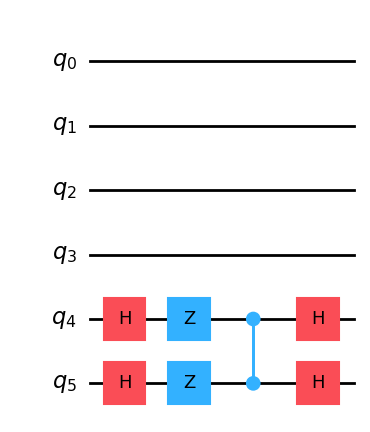

In [2]:
one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
# Coin operator
one_step_circuit.h([4,5])
one_step_circuit.z([4,5])
one_step_circuit.cz(4,5)
one_step_circuit.h([4,5])
#one_step_circuit.draw()
one_step_circuit.draw("mpl")

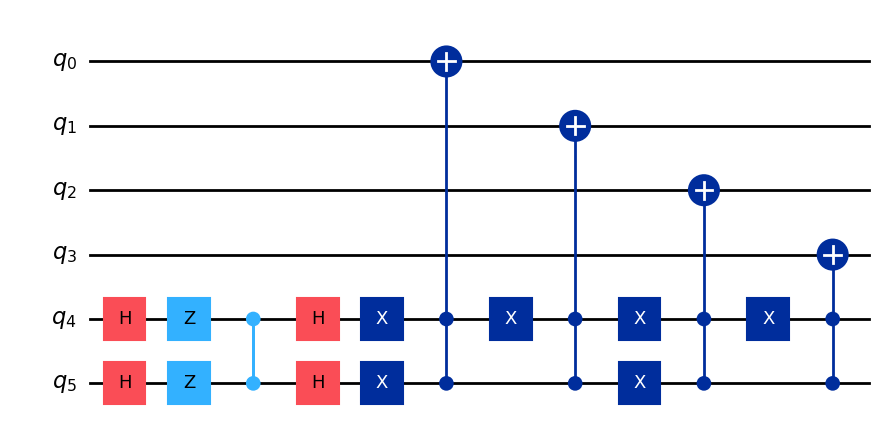

In [3]:
# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction() 
one_step_circuit.draw("mpl")

In [4]:
import numpy as np
from qiskit_aer.primitives import Sampler
 
from qiskit.circuit.library import EfficientSU2
 
n_qubits = 4
circuit = EfficientSU2(n_qubits)
circuit.decompose().draw("mpl")

measured_circuit = circuit.copy()
measured_circuit.measure_all()
 
rng = np.random.default_rng(1234)
params = rng.choice(
    [0, np.pi / 2, np.pi, 3 * np.pi / 2], 
    size=circuit.num_parameters,
)

In [5]:
circuit.num_parameters

32

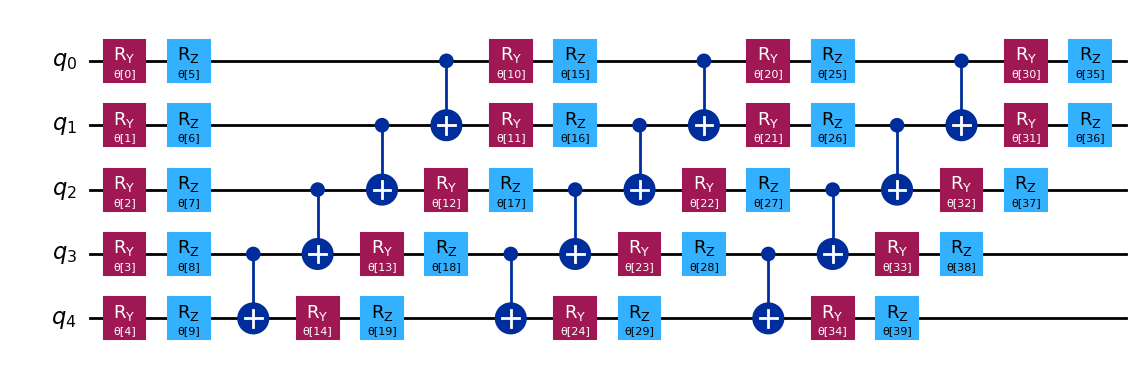

In [6]:
n_qubits = 5
circuit = EfficientSU2(n_qubits)
circuit.decompose().draw("mpl")

In [7]:
# Initialize a Sampler backed by the stabilizer circuit simulator
exact_sampler = Sampler(backend_options=dict(method="stabilizer"))
job = exact_sampler.run(measured_circuit, params)
exact_quasis = job.result().quasi_dists[0]
exact_quasis

{6: 0.0537109375, 15: 0.0517578125, 13: 0.0673828125, 5: 0.056640625, 9: 0.0595703125, 2: 0.06640625, 12: 0.068359375, 7: 0.0576171875, 0: 0.0625, 8: 0.0625, 11: 0.0712890625, 14: 0.05078125, 3: 0.072265625, 1: 0.0634765625, 10: 0.0673828125, 4: 0.068359375}

In [8]:
formatted_results = {format(key, f'0{n_qubits}b'): value for key, value in exact_quasis.items()}
formatted_results

{'00110': 0.0537109375,
 '01111': 0.0517578125,
 '01101': 0.0673828125,
 '00101': 0.056640625,
 '01001': 0.0595703125,
 '00010': 0.06640625,
 '01100': 0.068359375,
 '00111': 0.0576171875,
 '00000': 0.0625,
 '01000': 0.0625,
 '01011': 0.0712890625,
 '01110': 0.05078125,
 '00011': 0.072265625,
 '00001': 0.0634765625,
 '01010': 0.0673828125,
 '00100': 0.068359375}

In [9]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister

num_steps = 3  # Adjust as needed

# Create quantum and classical registers
n = 2 * num_steps + 1
qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qr, cr)

# Prepare an initial superposition state (|0⟩ + |1⟩) / sqrt(2)
qc.h(qr[0])

# Perform the quantum walk
for step in range(num_steps):
    # Apply the coin operator (Hadamard gate) on each node except the outermost ones
    for i in range(1, n - 1):
        qc.h(qr[i])
    
    # Apply conditional shift operations
    for i in range(n - 1):
        qc.cp(np.pi, qr[i], qr[i+1])  # Controlled phase flip with pi radians
    
    # Apply conditional shift operations with an inverted phase
    for i in range(n - 1):
        qc.cp(-np.pi, qr[i], qr[i+1])  # Controlled phase flip with -pi radians
    
# Measure the final state
qc.measure(qr, cr)

# Initialize a Sampler backed by the stabilizer circuit simulator
exact_sampler = Sampler(backend_options=dict(method="stabilizer"))
job = exact_sampler.run(qc)
exact_quasis = job.result().quasi_dists[0]
exact_quasis

KeyboardInterrupt: 

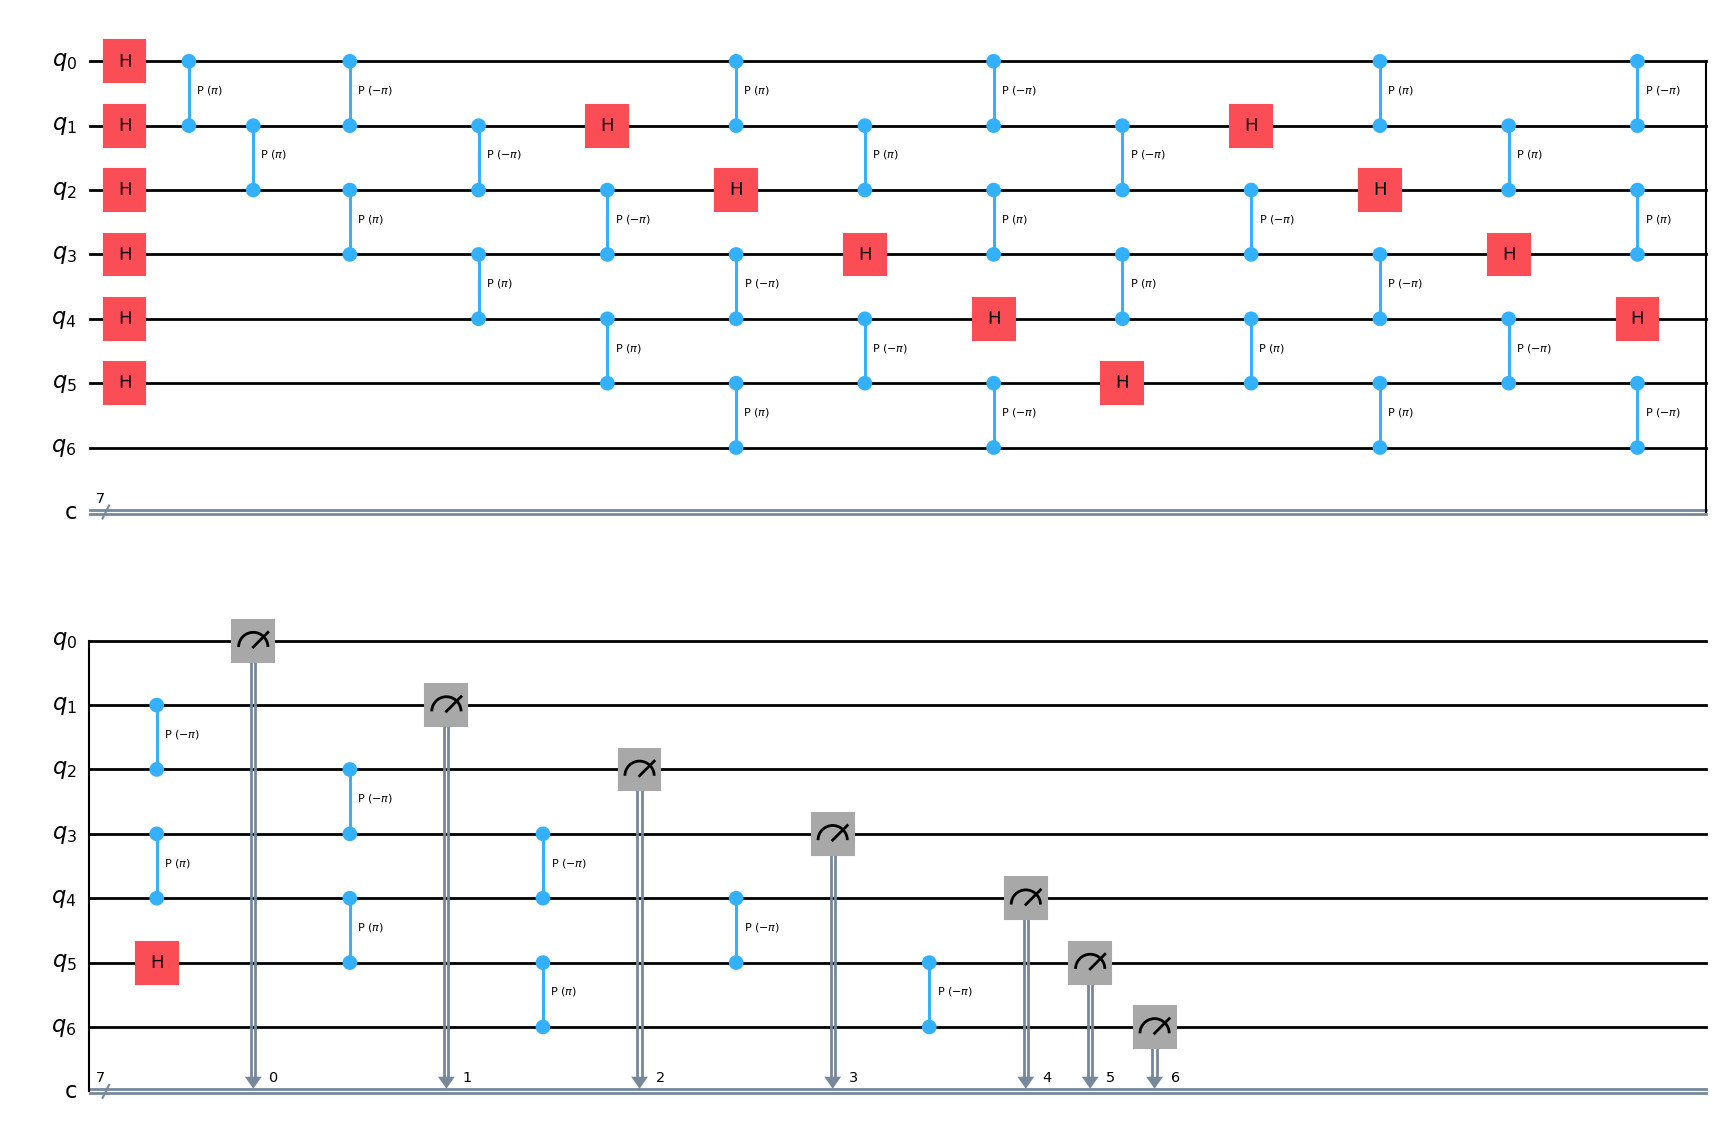

In [ ]:
qc.draw('mpl')

In [ ]:
n_bits = measured_circuit.num_qubits
sorted_quasis = {key : exact_quasis[key] for key in sorted(exact_quasis)}
sorted_quasis

{0: 0.0107421875,
 1: 0.0126953125,
 2: 0.0205078125,
 3: 0.0166015625,
 4: 0.0166015625,
 5: 0.01171875,
 6: 0.015625,
 7: 0.025390625,
 8: 0.01171875,
 9: 0.017578125,
 10: 0.0205078125,
 11: 0.0146484375,
 12: 0.009765625,
 13: 0.0126953125,
 14: 0.017578125,
 15: 0.0166015625,
 16: 0.01171875,
 17: 0.015625,
 18: 0.013671875,
 19: 0.015625,
 20: 0.013671875,
 21: 0.0107421875,
 22: 0.021484375,
 23: 0.01171875,
 24: 0.0146484375,
 25: 0.0126953125,
 26: 0.015625,
 27: 0.0166015625,
 28: 0.013671875,
 29: 0.0185546875,
 30: 0.0146484375,
 31: 0.01953125,
 32: 0.017578125,
 33: 0.015625,
 34: 0.01171875,
 35: 0.0107421875,
 36: 0.017578125,
 37: 0.0126953125,
 38: 0.0185546875,
 39: 0.0126953125,
 40: 0.015625,
 41: 0.0146484375,
 42: 0.0107421875,
 43: 0.0205078125,
 44: 0.013671875,
 45: 0.01953125,
 46: 0.0185546875,
 47: 0.025390625,
 48: 0.0166015625,
 49: 0.01953125,
 50: 0.017578125,
 51: 0.0166015625,
 52: 0.0205078125,
 53: 0.009765625,
 54: 0.01171875,
 55: 0.015625,
 56: 0

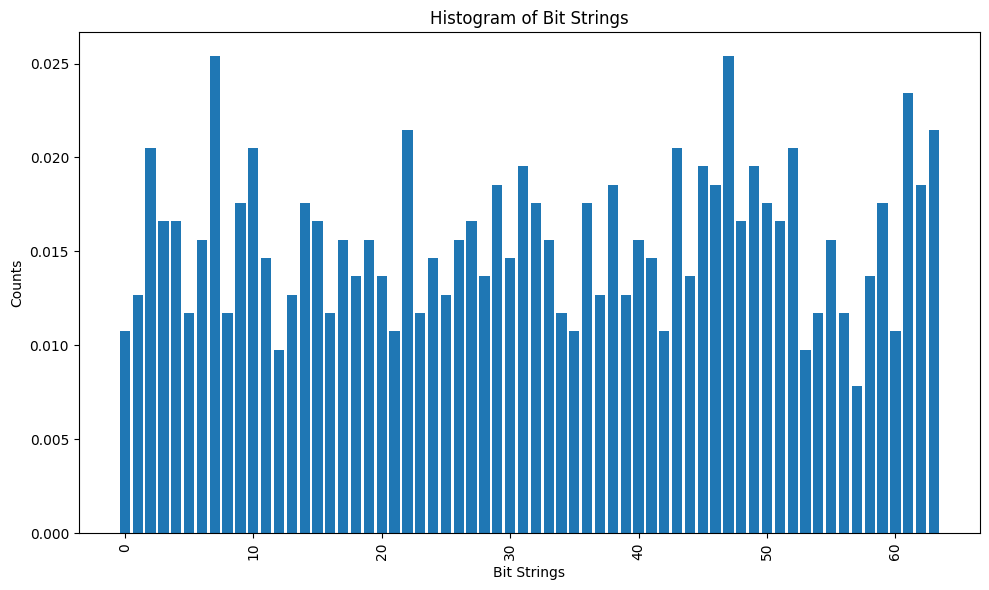

In [ ]:
bit_strings = list(exact_quasis.keys())
counts = list(exact_quasis.values())

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(bit_strings, counts)
plt.xlabel('Bit Strings')
plt.ylabel('Counts')
plt.title('Histogram of Bit Strings')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
num_steps = 3  # Adjust as needed

# Create quantum and classical registers
n = 2 * num_steps + 1
qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qr, cr)

# Prepare an initial superposition state (|0⟩ + |1⟩) / sqrt(2)
qc.h(qr[0])

# Perform the quantum walk
for step in range(num_steps):
    # Apply the coin operator (Hadamard gate) on each node except the outermost ones
    for i in range(1, n - 1):
        qc.h(qr[i])
    
    # Apply conditional shift operations
    for i in range(n - 1):
        qc.cp(np.pi, qr[i], qr[i+1])  # Controlled phase flip with pi radians
    
    # Apply conditional shift operations with an inverted phase
    for i in range(n - 1):
        qc.cp(-np.pi, qr[i], qr[i+1])  # Controlled phase flip with -pi radians
    
# Measure the final state
qc.measure(qr, cr)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=5000)
result = job.result()
counts = result.get_counts()



NameError: name 'QuantumRegister' is not defined

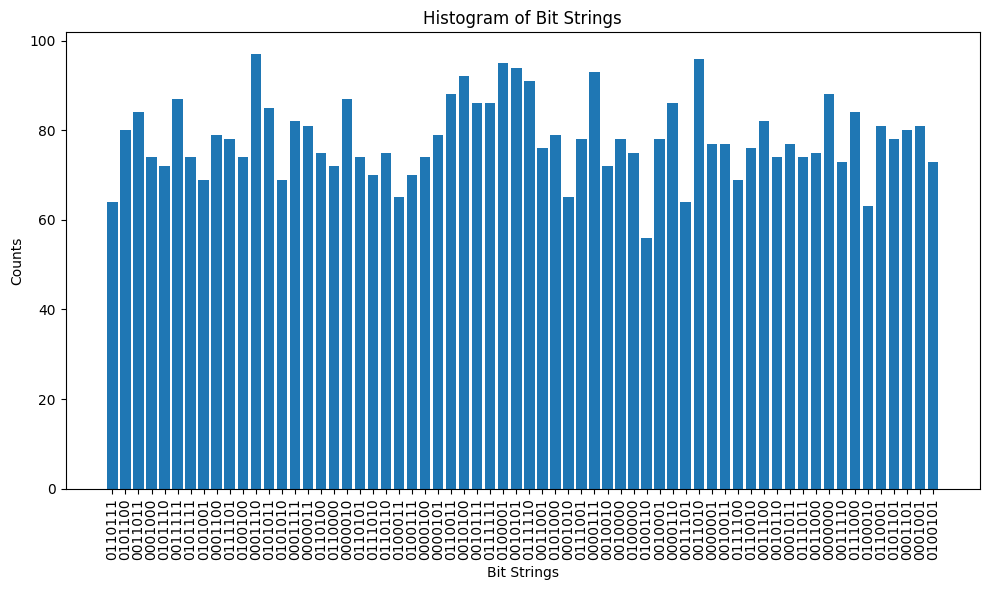

In [ ]:
bit_strings = list(counts.keys())
counts = list(counts.values())

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(bit_strings, counts)
plt.xlabel('Bit Strings')
plt.ylabel('Counts')
plt.title('Histogram of Bit Strings')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate

one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
# Coin operator
#one_step_circuit.h([4,5])
#one_step_circuit.z([4,5])
#one_step_circuit.cz(4,5)
#one_step_circuit.h([4,5])
#one_step_circuit.x(4)
beta = np.pi / 4  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)],
                     [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

one_step_circuit.append(R_gate, [5])
one_step_circuit.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ R ├
     └───┘

In [ ]:
# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

#shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction() 
one_step_circuit.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ R ├
     └───┘

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import circuit_drawer
import numpy as np

# Define the quantum circuit and gate
one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
# Coin operator
one_step_circuit.h([4, 5])
one_step_circuit.z([4, 5])
one_step_circuit.cz(4, 5)
one_step_circuit.h([4, 5])

# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0, 4):
        circuit.x(4)
        if i % 2 == 0:
            circuit.x(5)
        circuit.ccx(4, 5, i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction()

# Create a Quantum Circuit for 1000 steps
num_steps = 15
qr = QuantumRegister(6, 'q')
cr = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qr, cr)

# Apply the one_step_gate 1000 times
for _ in range(num_steps):
    circuit.append(one_step_gate, qr)

# Measurement
circuit.measure(qr, cr)

# Draw the circuit
#circuit_drawer(circuit, scale=0.7, output='mpl')


In [1]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Estimator 
#from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
#from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

from qiskit.primitives import Sampler

from matplotlib import pyplot as plt
import numpy as np

In [2]:
one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 

beta = np.pi / 5  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)],
                     [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='C')

one_step_circuit.append(R_gate, [4])
one_step_circuit.append(R_gate, [5])

# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0, 4):
        circuit.x(4)
        if i % 2 == 0:
            circuit.x(5)
        circuit.ccx(4, 5, i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction()


num_steps = 6
qr = QuantumRegister(6, 'q')
cr = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qr, cr)

# Apply the one_step_gate 1000 times
for _ in range(num_steps):
    circuit.append(one_step_gate, qr)
    
circuit.measure(qr, cr)
    
circuit_drawer(circuit, scale=0.7, output='mpl')

NameError: name 'UnitaryGate' is not defined

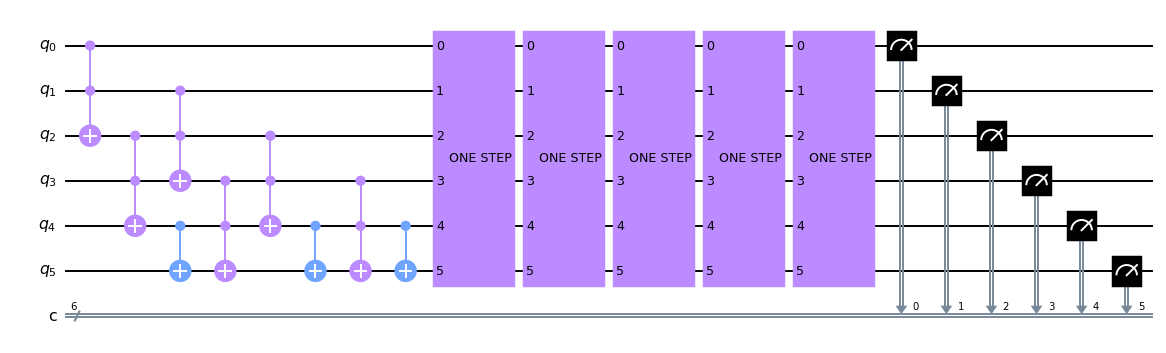

In [ ]:
circuit_drawer(circuit, scale=0.7, output='mpl')

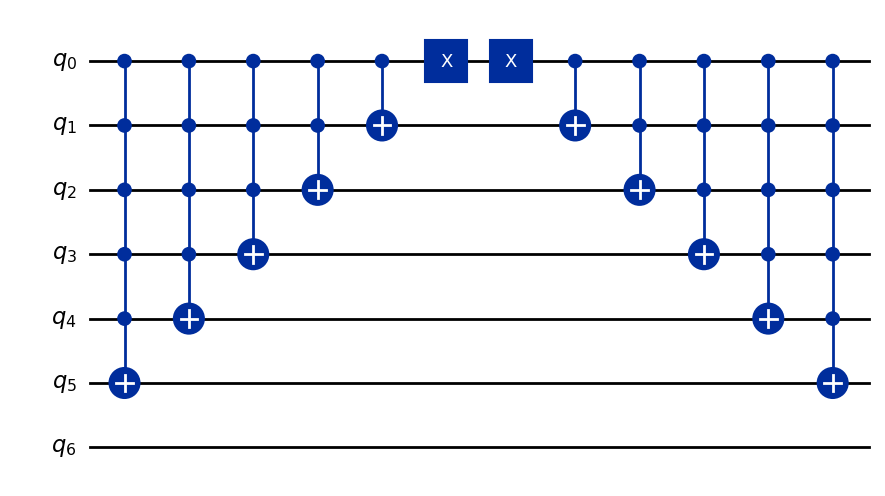

In [2]:
from qiskit.circuit.library import MCXGate

one_step_circuit = QuantumCircuit(7, name='ONE STEP')

gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)

def incrementBlock(circuit):
    circuit.append(gate5, [0, 1, 2, 3, 4, 5])
    circuit.append(gate4, [0, 1, 2, 3, 4])
    circuit.append(gate3, [0, 1, 2, 3])
    circuit.ccx(0,1,2)
    circuit.cx(0,1)
    circuit.x(0)

def decrementBlock(circuit):
    circuit.x(0)
    circuit.cx(0,1)
    circuit.ccx(0,1,2)
    circuit.append(gate3, [0, 1, 2, 3])
    circuit.append(gate4, [0, 1, 2, 3, 4])
    circuit.append(gate5, [0, 1, 2, 3, 4, 5])

# Apply the incrementBlock function
incrementBlock(one_step_circuit)
decrementBlock(one_step_circuit)
one_step_gate = one_step_circuit.to_instruction()

one_step_circuit.draw('mpl')


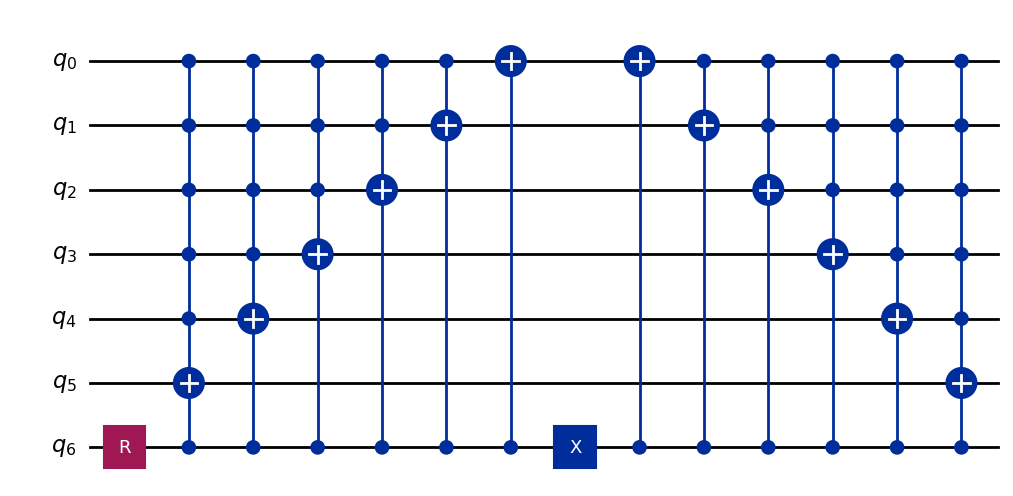

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate


one_step_circuit = QuantumCircuit(7, name='ONE STEP')


beta = np.pi / 5  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')


gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit):
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.ccx(0, 6, 1)
    circuit.cx(6,0)

def decrementBlock(circuit):
    circuit.cx(6,0)
    circuit.ccx(0, 6, 1)
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])

one_step_circuit.append(R_gate, [6])
incrementBlock(one_step_circuit)
one_step_circuit.x(6) 
decrementBlock(one_step_circuit)
one_step_gate = one_step_circuit.to_instruction()

one_step_circuit.draw('mpl')

In [4]:
gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit):
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.ccx(0, 6, 1)
    circuit.cx(6,0)

def decrementBlock(circuit):
    circuit.cx(6,0)
    circuit.ccx(0, 6, 1)
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])

def create_coin(angle = 1):
    beta = np.pi / angle
    C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
    coin = UnitaryGate(C_matrix, label='R')
    return coin

def initialize_quantum_circuit(qubits=2, angle = 1, bitString='000000'):
    circuit_base, coin = quantum_base(qubits, angle)
    circuit_base.initialize(bitString, circuit_base.qubits[:qubits-1])
    return circuit_base, coin

def get_single_step(qubits, coin):
    one_step_circuit = QuantumCircuit(qubits, name='STEP')

    one_step_circuit.reset(6)
    
    one_step_circuit.h(6)
    one_step_circuit.append(coin, [6])
    incrementBlock(one_step_circuit)
    one_step_circuit.x(6)
    decrementBlock(one_step_circuit)
    one_step_gate = one_step_circuit.to_instruction()

    return one_step_gate
    

def circuit_initialized_qw_steps(num_qubits=7, num_steps=1, angle = 1, bitString='000000'):

    qr = QuantumRegister(num_qubits, 'q')
    cr = ClassicalRegister(num_qubits, 'c')
    coin = create_coin()

    circuit = QuantumCircuit(qr, cr)

    circuit.initialize(bitString, circuit.qubits[:num_qubits-1])

    one_step_gate = get_single_step(num_qubits, coin)

    #circuit.h(6)
    for _ in range(num_steps):
        circuit.append(one_step_gate, qr)
        
    circuit.measure(qr,cr)

    return circuit

In [5]:
circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=15, angle=2, bitString='000000')
sampler = Sampler()
job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
job_result = job.result()
job_result

SamplerResult(quasi_dists=[{7: 0.500000000000016, 69: 0.500000000000018}], metadata=[{}])

In [104]:
def to_binary_list(list_of_numbers, n_bits):
    binary_list = [format(num, f'0{n_bits}b') for num in list_of_numbers]
    return binary_list

def list_of_walker_coin_probability(quasi_probs, walker_size_list=[6], coin_size_list=[1]):
    '''
    input:
    quasi probabilities {}
    output:
    walker_list = [w_1,w_2,...]
    coin_list   = [c_1,c_2,...]
    '''
    list_walker_possition = []
    list_coin_results = []
    list_walker_probability = []

    #for walker_size, coin_size in zip(walker_size_list, coin_size_list):
    
    for i in range(0, 2**(walker_size_list[0]+coin_size_list[0]) ):

        binary_possition = format(i, f'0{walker_size_list[0] + coin_size_list[0]}b') 

        list_walker_possition.append( binary_possition[coin_size_list[0]:] )
        list_coin_results.append( binary_possition[:coin_size_list[0]] )

        if i in quasi_probs:
            list_walker_probability.append(quasi_probs[i])
        else:
            list_walker_probability.append(0)
    

    return list_walker_possition, list_coin_results, list_walker_probability
# Example usage:

In [165]:
gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

# Define the increment block
def incrementBlock(circuit):
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.ccx(0, 6, 1)
    circuit.cx(6,0)

def decrementBlock(circuit):
    circuit.cx(6,0)
    circuit.ccx(0, 6, 1)
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])

# Define the coin gate creation function
def create_coin(angle=1):
    beta = np.pi / angle
    C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
    coin = UnitaryGate(C_matrix, label='R')
    return coin

# Define the function to get a single step gate
def get_single_step(qubits, coin):
    one_step_circuit = QuantumCircuit(qubits, name='STEP')
    one_step_circuit.h(6)
    one_step_circuit.append(coin, [6])
    incrementBlock(one_step_circuit)
    one_step_circuit.x(6)
    decrementBlock(one_step_circuit)
    one_step_gate = one_step_circuit.to_instruction()

    return one_step_gate

# Define the main function to create the quantum walk circuit
def circuit_initialized_qw_steps(num_qubits=7, num_steps=1, angle=1, bitString='000000'):
    qr = QuantumRegister(num_qubits, 'q')
    cr = ClassicalRegister(num_qubits-1, 'c')
    coin = create_coin(angle)

    circuit = QuantumCircuit(qr, cr)
    circuit.initialize(bitString, circuit.qubits[:num_qubits-1])

    one_step_gate = get_single_step(num_qubits, coin)

    for _ in range(num_steps):
        circuit.append(one_step_gate, qr)

    #circuit.reset(6)
    circuit.measure(qr[:num_qubits-1], cr)
    return circuit

def get_circuit_qw_steps_and_transformation(transformation, num_qubits=7, num_steps=1, angle=1, bitString='000000'):
    qr = QuantumRegister(num_qubits, 'q')
    cr = ClassicalRegister(num_qubits-1, 'c')
    coin = create_coin(angle)

    circuit = QuantumCircuit(qr, cr)
    circuit.initialize(bitString, circuit.qubits[:num_qubits-1])

    one_step_gate = get_single_step(num_qubits, coin)

    for _ in range(num_steps):
        circuit.append(one_step_gate, qr)

    transformation(circuit)
    #circuit.reset(6)
    circuit.measure(qr[:num_qubits-1], cr)
    return circuit

In [19]:
circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=15, angle=2, bitString='000000')
sampler = Sampler()
job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
job_result = job.result()

quasi_probs = job_result.quasi_dists[0]
list_walker_possition, list_coin_results, list_walker_probability = list_of_walker_coin_probability(quasi_probs, walker_size_list=[6], coin_size_list=[1])

In [20]:
list_walker_possition

['000000',
 '000001',
 '000010',
 '000011',
 '000100',
 '000101',
 '000110',
 '000111',
 '001000',
 '001001',
 '001010',
 '001011',
 '001100',
 '001101',
 '001110',
 '001111',
 '010000',
 '010001',
 '010010',
 '010011',
 '010100',
 '010101',
 '010110',
 '010111',
 '011000',
 '011001',
 '011010',
 '011011',
 '011100',
 '011101',
 '011110',
 '011111',
 '100000',
 '100001',
 '100010',
 '100011',
 '100100',
 '100101',
 '100110',
 '100111',
 '101000',
 '101001',
 '101010',
 '101011',
 '101100',
 '101101',
 '101110',
 '101111',
 '110000',
 '110001',
 '110010',
 '110011',
 '110100',
 '110101',
 '110110',
 '110111',
 '111000',
 '111001',
 '111010',
 '111011',
 '111100',
 '111101',
 '111110',
 '111111',
 '000000',
 '000001',
 '000010',
 '000011',
 '000100',
 '000101',
 '000110',
 '000111',
 '001000',
 '001001',
 '001010',
 '001011',
 '001100',
 '001101',
 '001110',
 '001111',
 '010000',
 '010001',
 '010010',
 '010011',
 '010100',
 '010101',
 '010110',
 '010111',
 '011000',
 '011001',
 '011010',

In [9]:
''''
list_a, list_b = list_of_index_proba(job_result.quasi_dists[0])
bit_strings = list(list_a)
counts = list(list_b)

# Plot the histogram
plt.figure(figsize=(16, 2.5))  # Adjust the figure size as needed
plt.bar(bit_strings, counts)
plt.xlabel('Bit Strings')
plt.ylabel('Counts')
plt.title('Histogram of Bit Strings')
plt.xticks(ticks=range(len(bit_strings)), rotation=90, fontsize=8)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()
'''
def list_of_index_proba(quasi_probs, qubit_num=2):
    list_of_index = []
    list_of_proba = []

    for i in range(0,2**qubit_num):
        list_of_index.append(i)
        if i in quasi_probs:
            list_of_proba.append(quasi_probs[i])
        else:
            list_of_proba.append(0)

    return list_of_index, list_of_proba

def plot_states_quasi(job_result, qubit_num=2):
    
    list_a, list_b = list_of_index_proba(job_result.quasi_dists[0], qubit_num)
    bit_strings = list(list_a)
    counts = list(list_b)

    # Plot the histogram
    plt.figure(figsize=(16, 2.5))  # Adjust the figure size as needed
    plt.bar(bit_strings, counts)
    plt.xlabel('Bit Strings')
    plt.ylabel('Counts')
    plt.title('Histogram of Bit Strings')
    plt.xticks(ticks=range(len(bit_strings)), rotation=90, fontsize=8)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()


def plot_states_quasi_probability(job_result):
    
    list_a, list_b = list_of_index_proba(job_result.quasi_dists[0],7)
    bit_strings = list(list_a)
    counts = list(list_b)

    # Plot the histogram
    plt.figure(figsize=(16, 2.5))  # Adjust the figure size as needed
    plt.bar(bit_strings, counts)
    plt.xlabel('Bit Strings')
    plt.ylabel('Counts')
    plt.title('Histogram of Bit Strings')
    plt.xticks(ticks=range(len(bit_strings)), rotation=90, fontsize=8)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()


{0: 0.003906250000001, 2: 0.101562500000026, 4: 0.039062500000011, 6: 0.070312500000019, 8: 0.070312500000019, 10: 0.101562500000029, 12: 0.414062500000111, 14: 0.195312500000054, 16: 0.003906250000001}


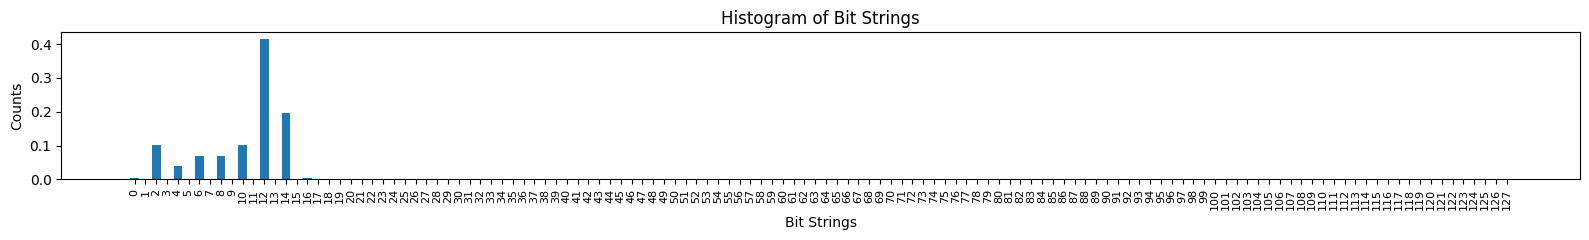

In [149]:
circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=8, angle=2, bitString='001000')
sampler = Sampler()
job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
job_result = job.result()
print(job_result.quasi_dists[0])
plot_states_quasi_probability(job_result)

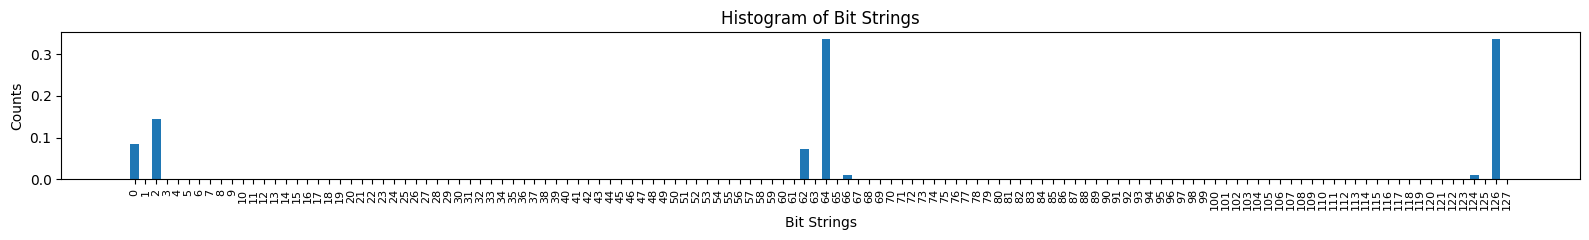

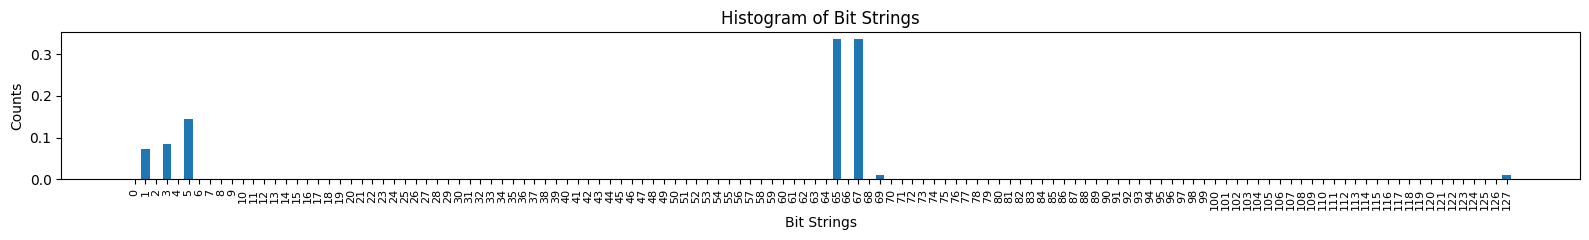

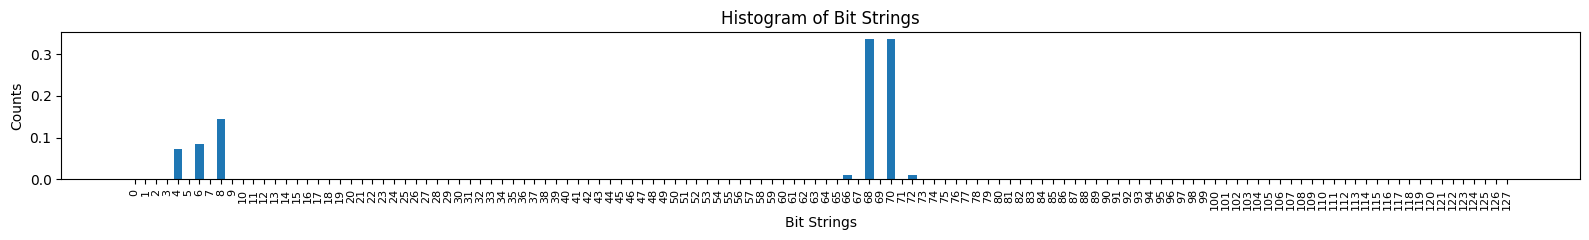

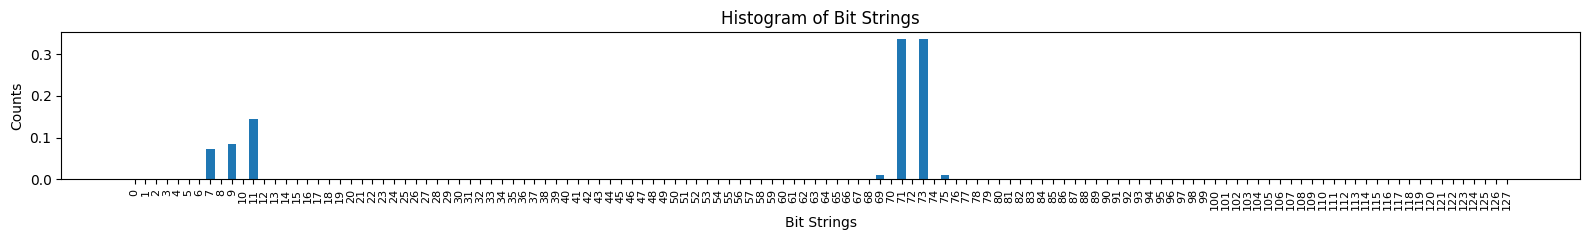

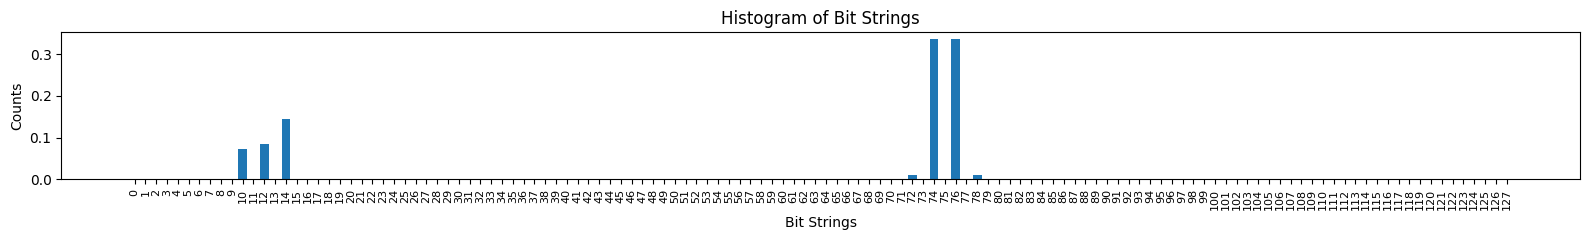

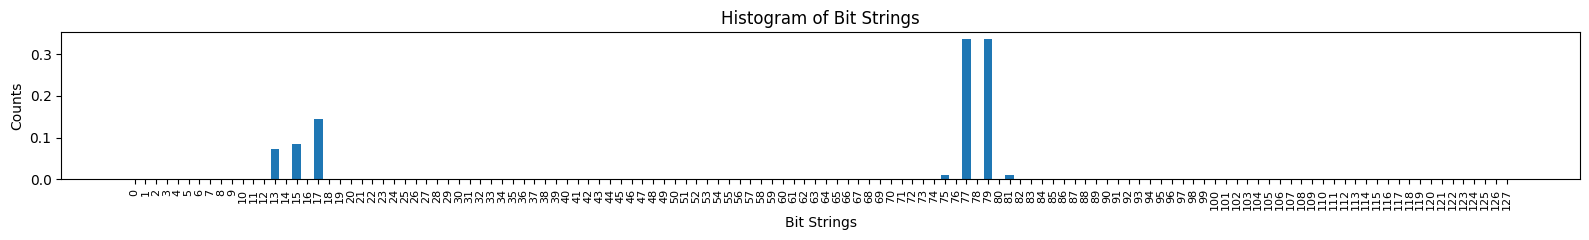

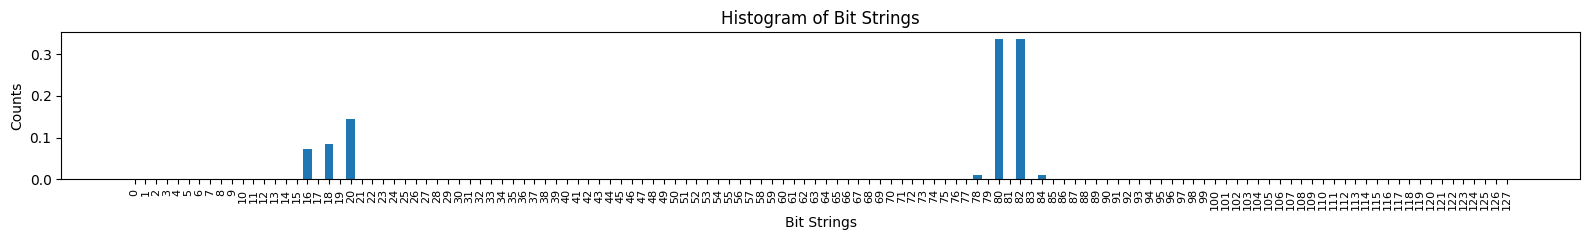

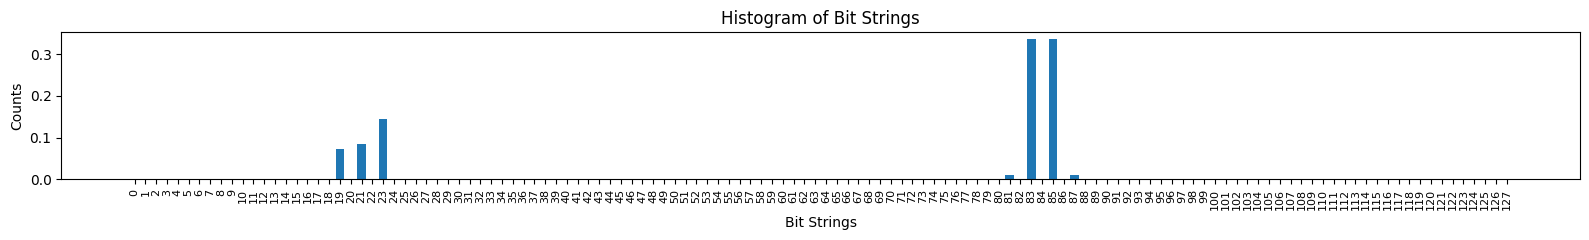

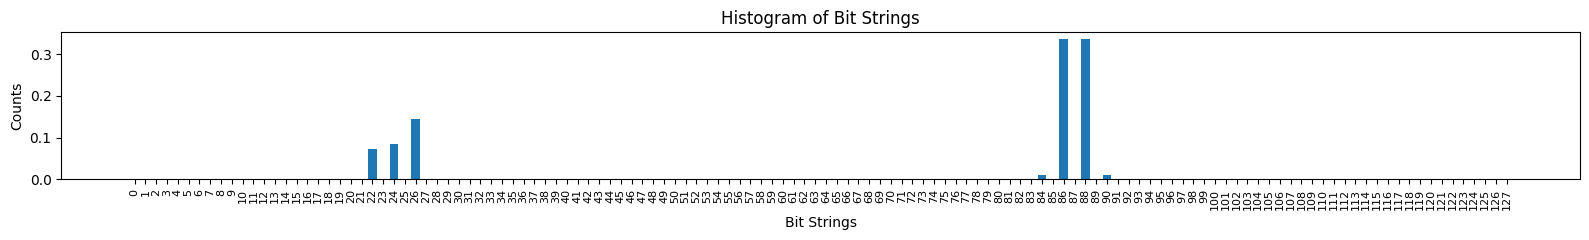

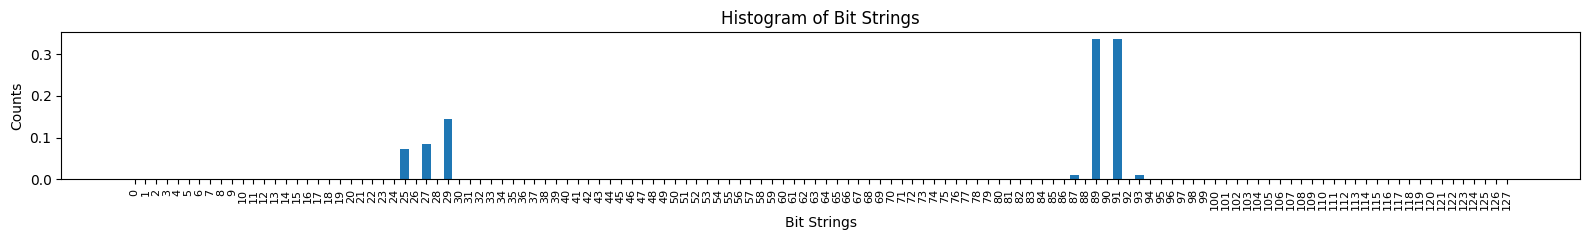

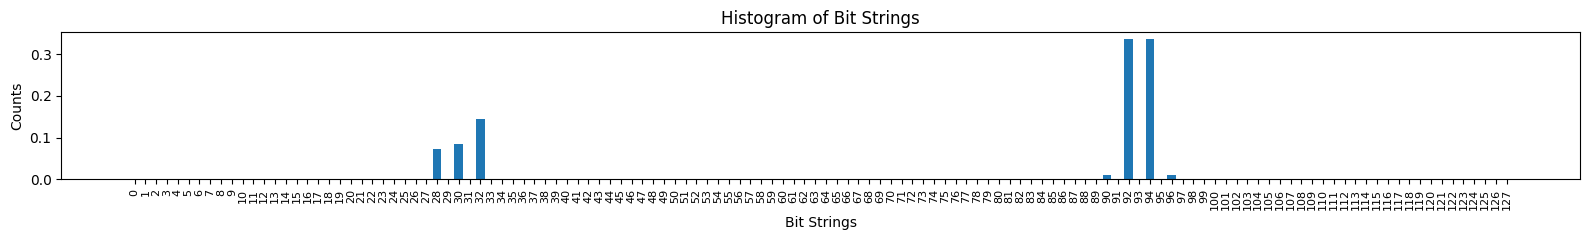

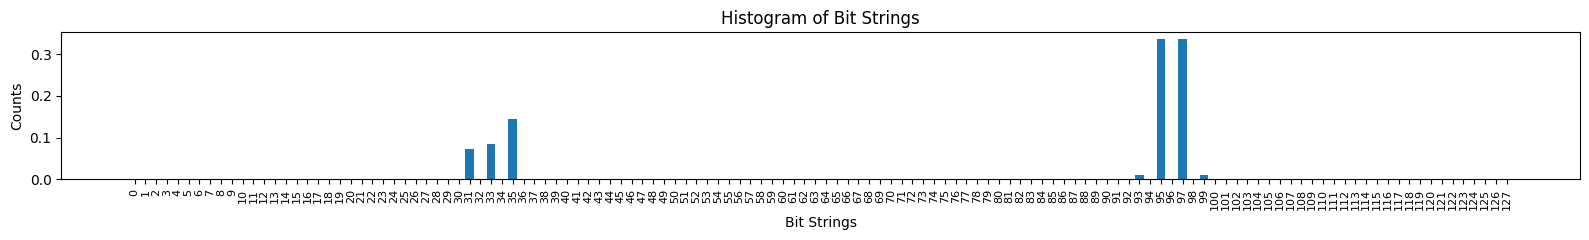

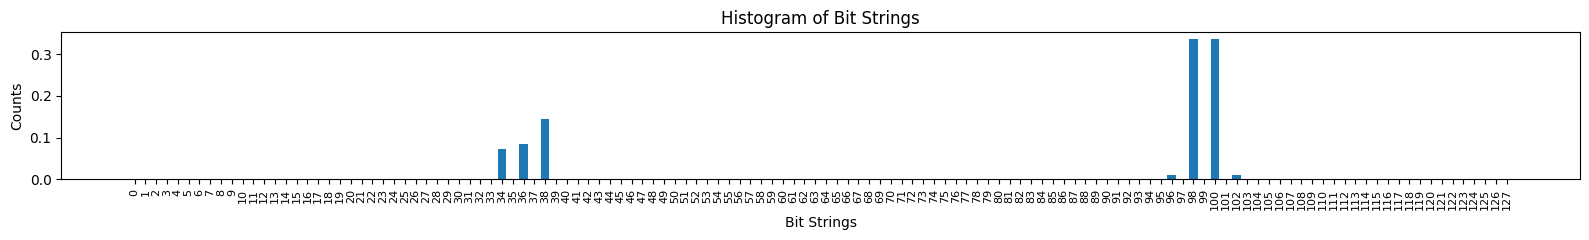

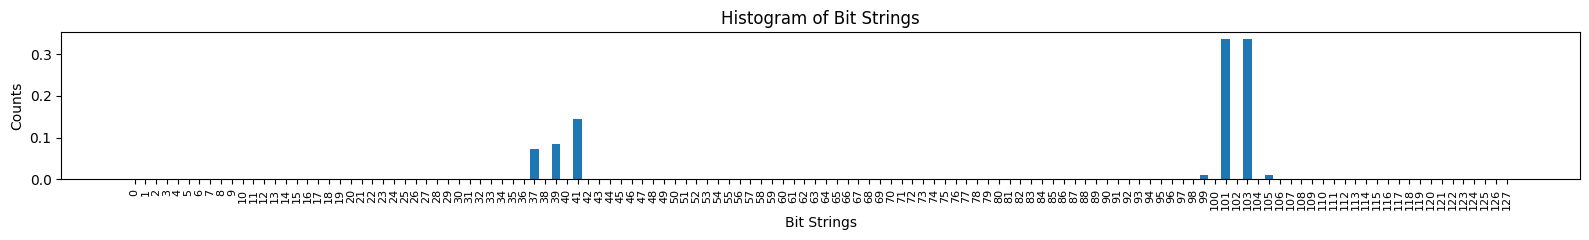

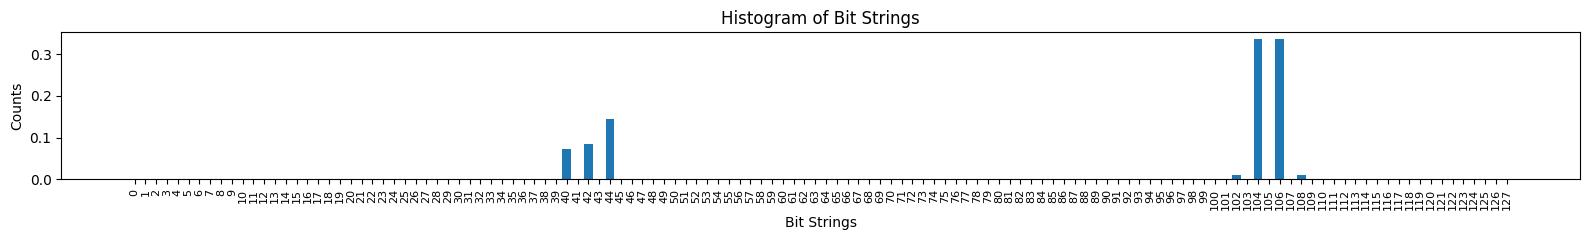

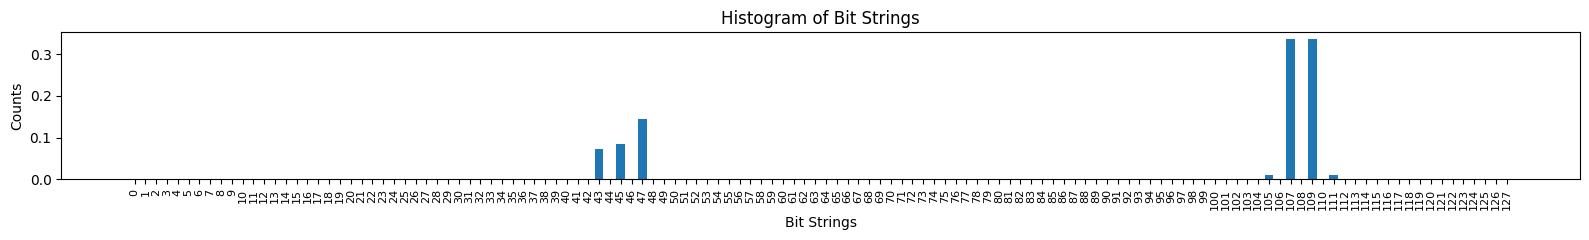

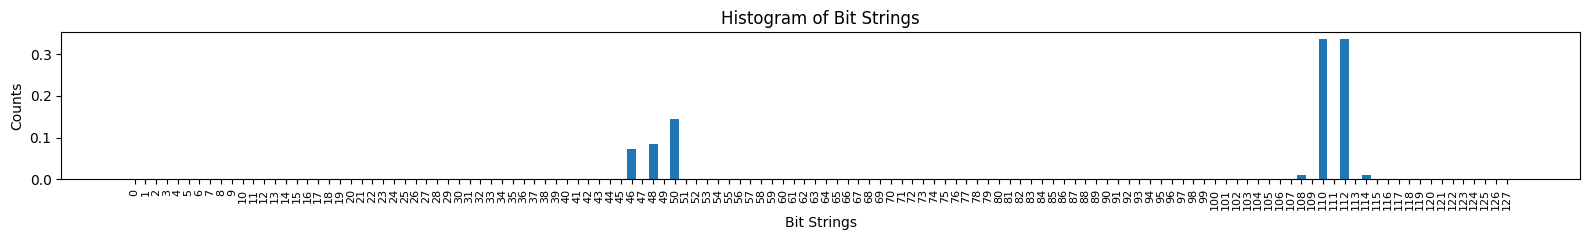

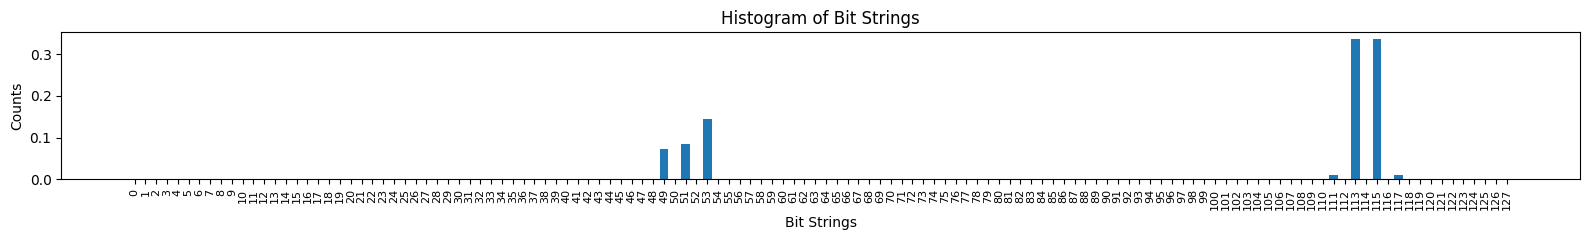

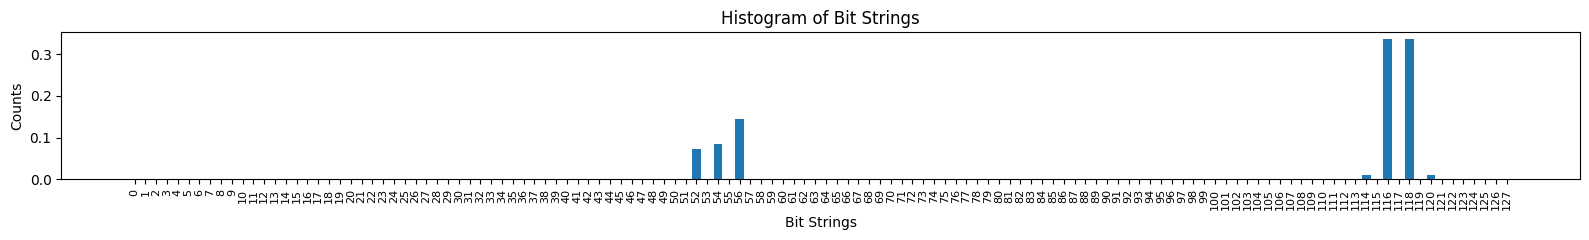

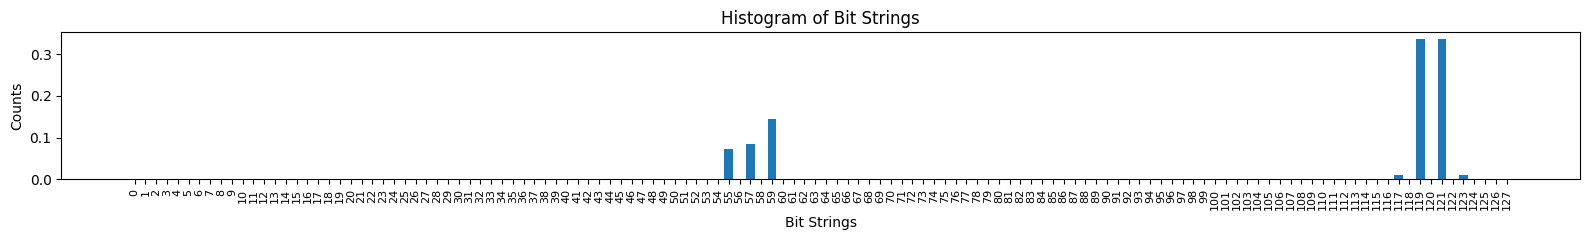

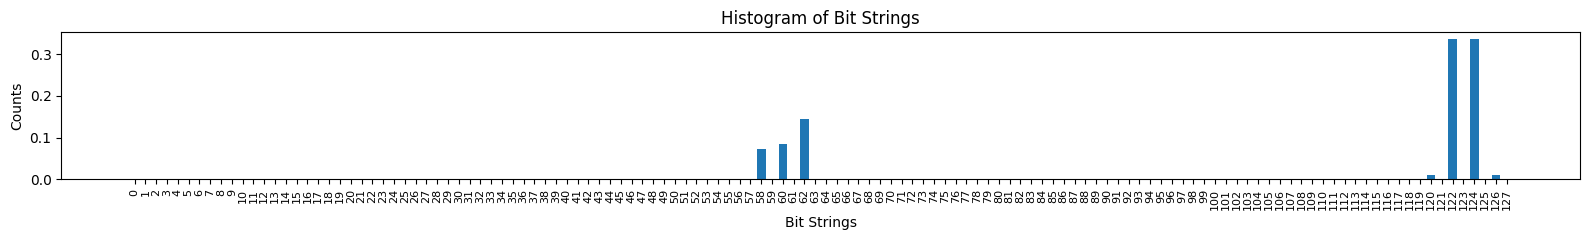

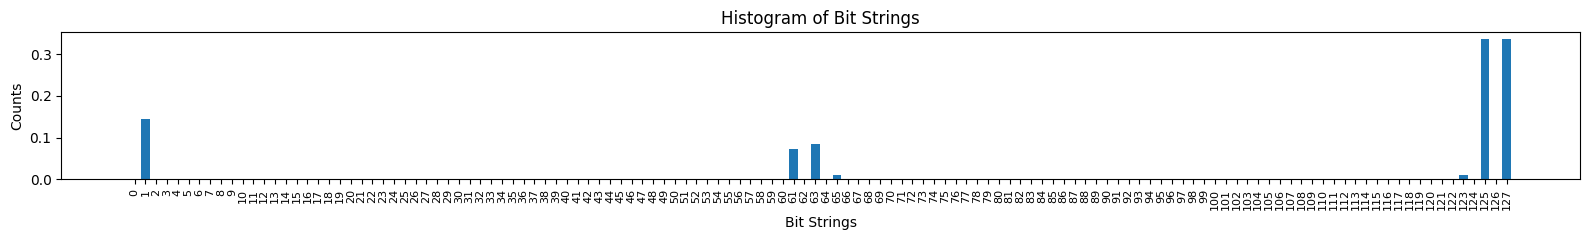

In [27]:
list_num = [i for i in range(0,64,3)]
list_binary_rep = to_binary_list(list_num,6)

for binary_string in list_binary_rep:
    #print(binary_string)
    circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=12, angle = 5, bitString=binary_string)
    sampler = Sampler()
    job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
    job_result = job.result()
    plot_states_quasi_probability(job_result)

In [11]:
circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=16, angle=2, bitString='000000')
sampler = Sampler()
job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
job_result = job.result()
job_result

SamplerResult(quasi_dists=[{0: 0.026816987740805, 2: 0.044330122591941, 4: 0.092491243432568, 6: 0.129794220665494, 8: 0.009654115586689, 10: 0.447657618213677, 12: 0.129794220665493, 14: 0.004925569176884, 16: 2.1891418564e-05, 50: 2.1891418564e-05, 52: 0.002648861646235, 54: 0.023839754816113, 56: 0.001072679509632, 58: 0.026816987740807, 60: 0.033296847635728, 62: 0.026816987740805}], metadata=[{}])

In [28]:
def to_binary_list(list_of_numbers, n_bits):
    binary_list = [format(num, f'0{n_bits}b') for num in list_of_numbers]
    return binary_list

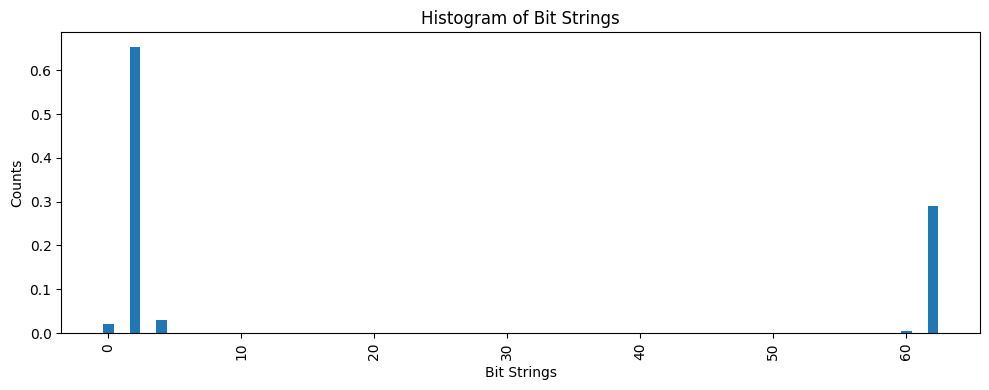

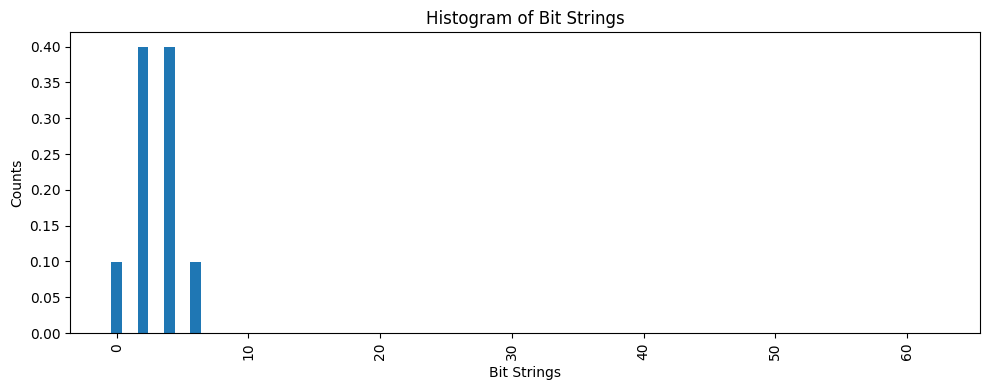

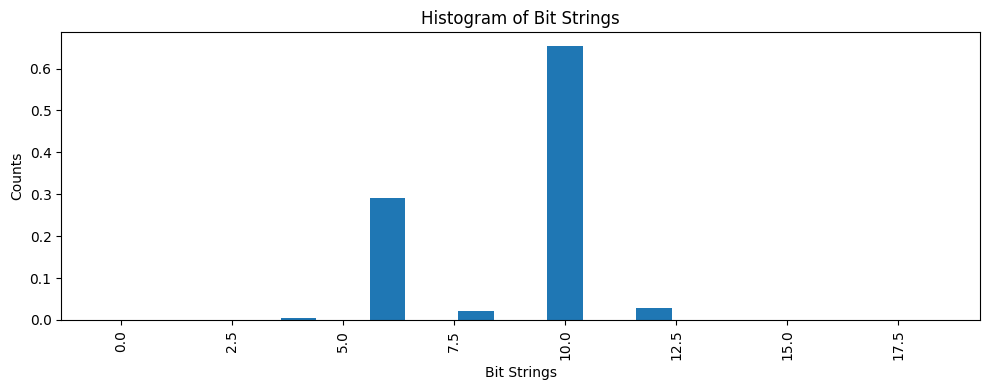

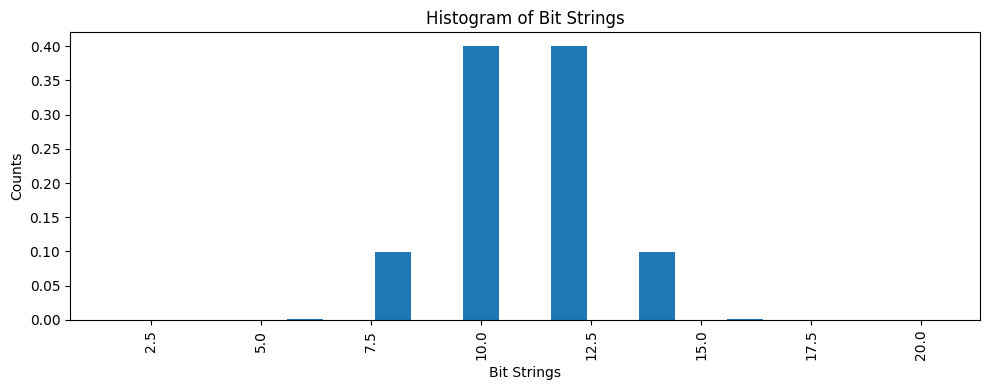

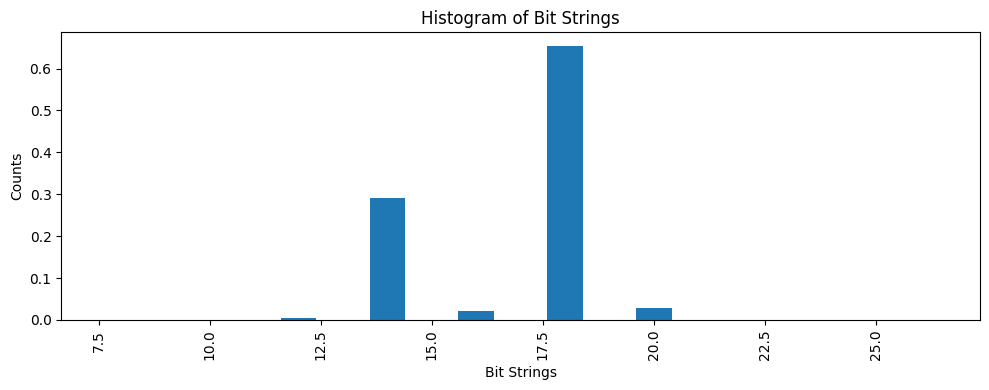

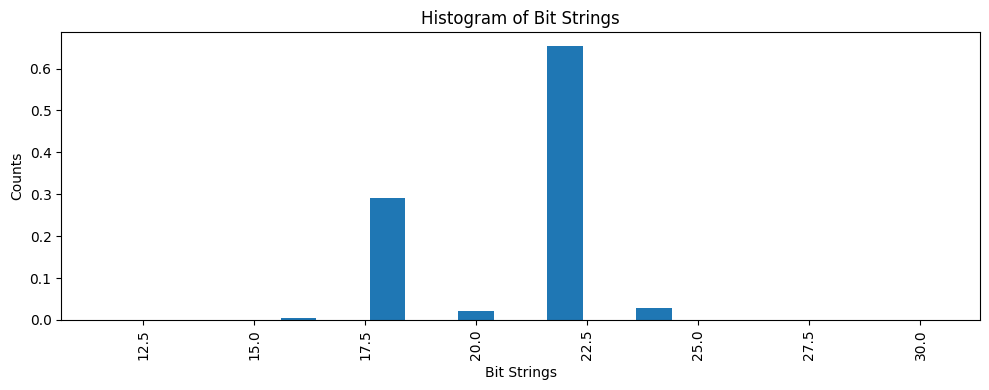

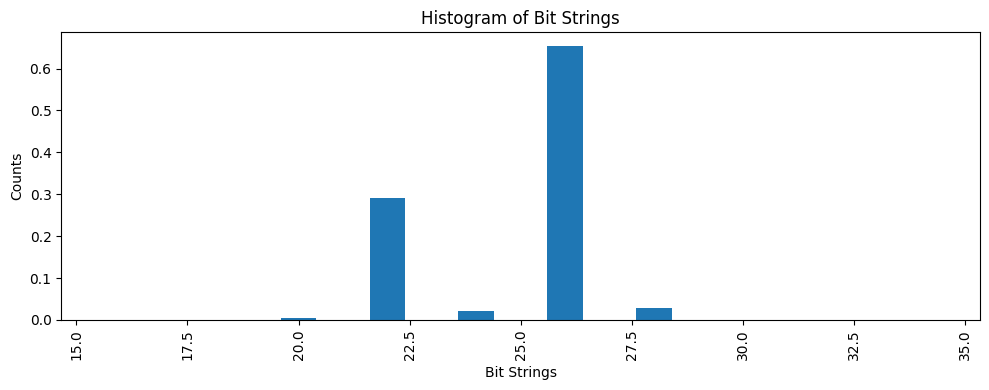

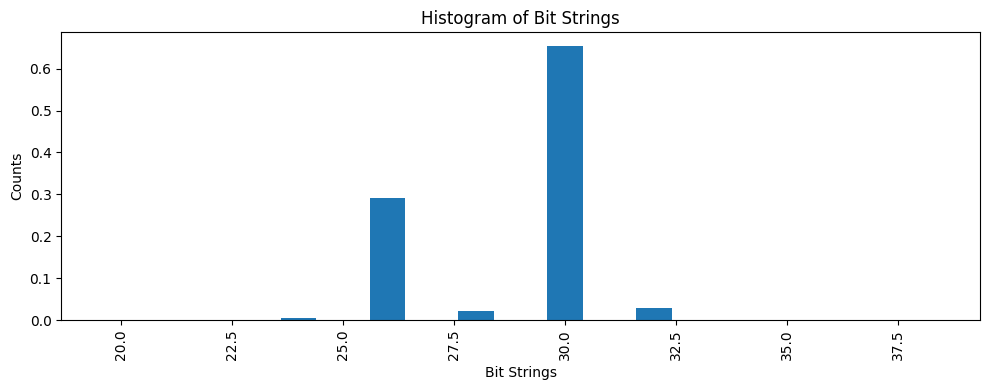

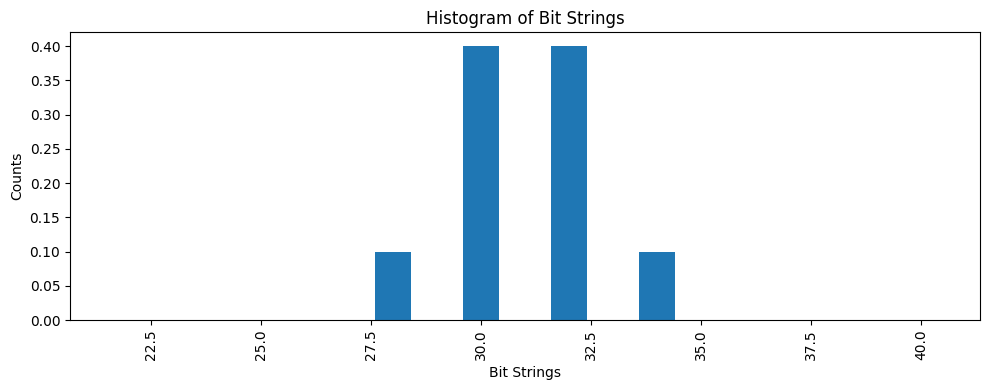

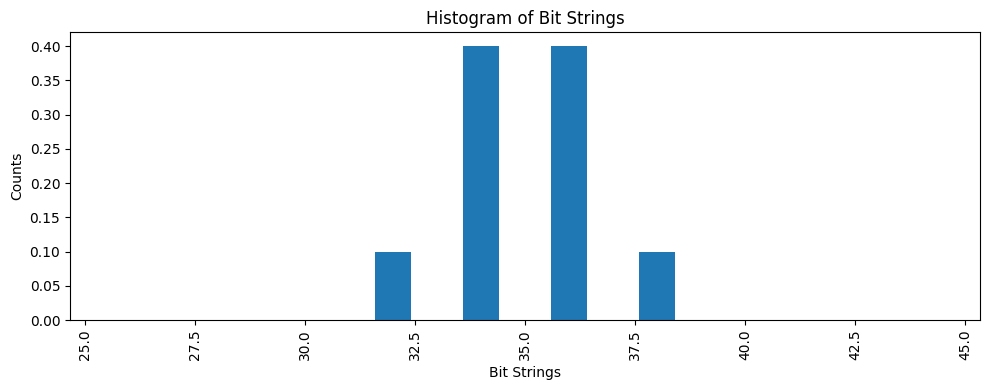

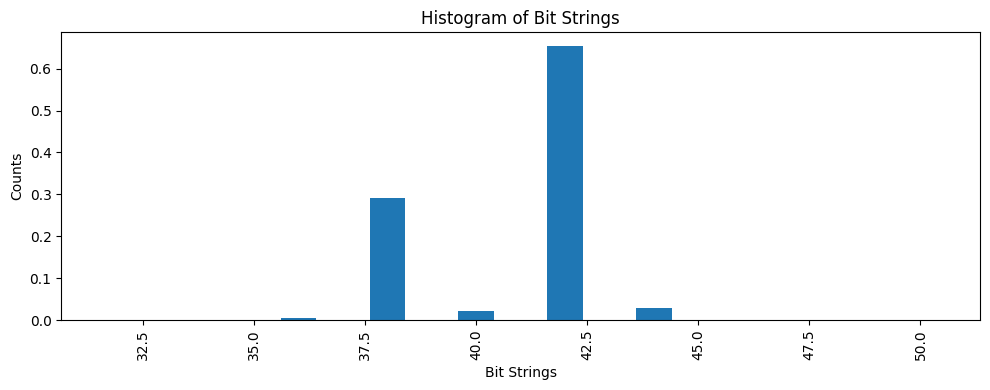

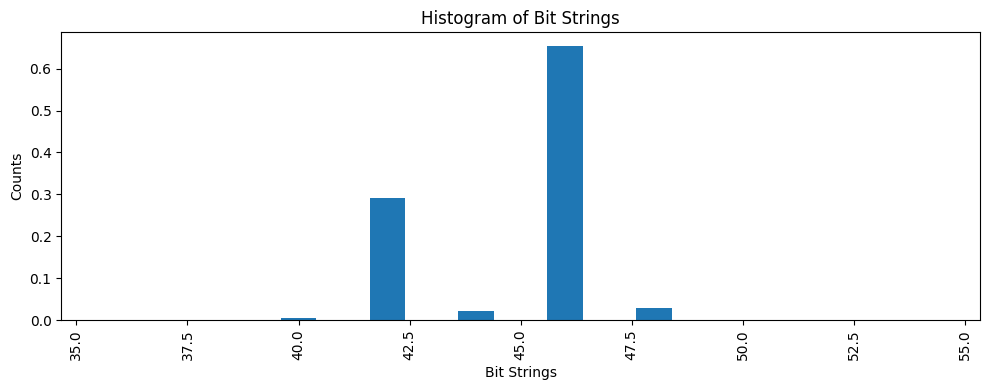

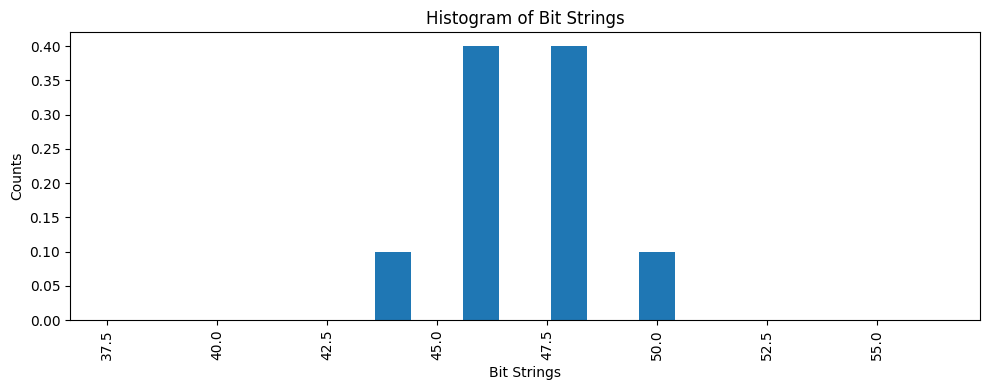

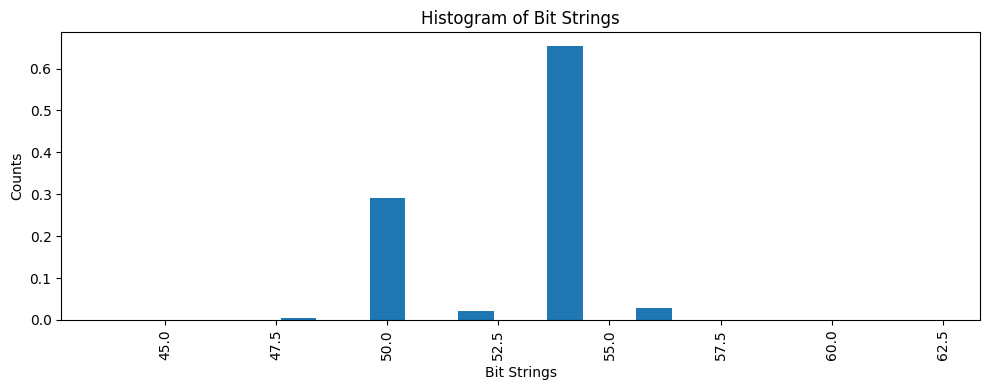

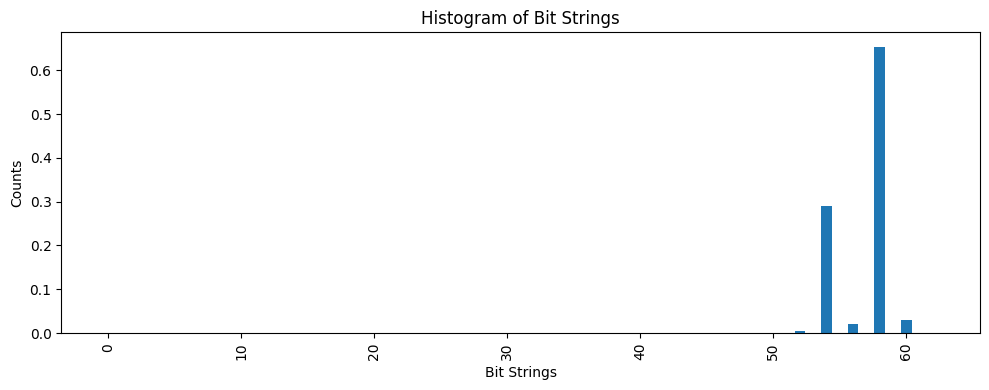

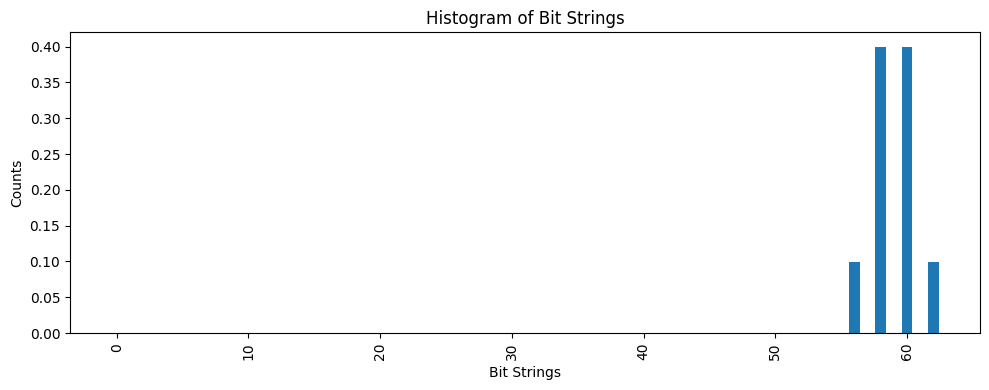

In [13]:
list_num = [4*i for i in range(0,16)]
list_binary_rep = to_binary_list(list_num,6)

for binary_string in list_binary_rep:
    circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=10, angle = 3, bitString=binary_string)
    sampler = Sampler()
    job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
    job_result = job.result()

    counts = job_result.quasi_dists[0]

    bit_strings = list(counts.keys())
    counts = list(counts.values())

    plt.figure(figsize=(10, 4)) 
    plt.bar(bit_strings, counts)
    plt.xlabel('Bit Strings')
    plt.ylabel('Counts')
    plt.title('Histogram of Bit Strings')
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.tight_layout()

    # Show the plot
    plt.show()

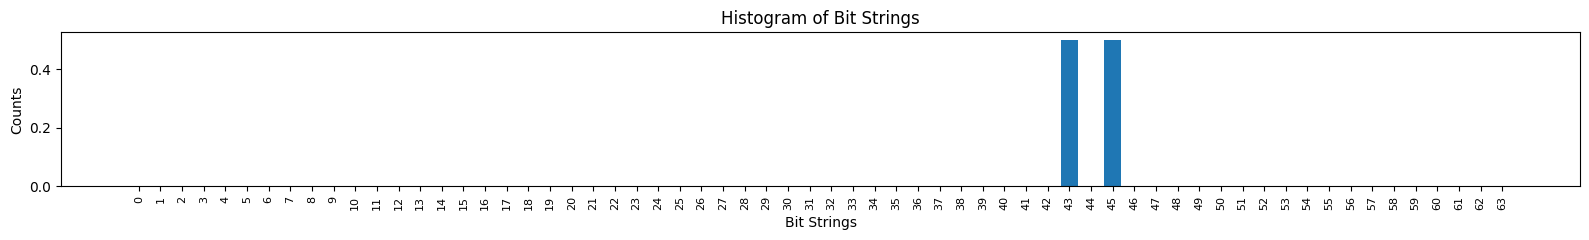

In [57]:
circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=2, angle = 1.7, bitString='101101')
sampler = Sampler()
job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
job_result = job.result()

plot_states_quasi(job_result, qubit_num=6)

*Application QW*

In [389]:
def get_circuit_qw_steps_and_transformation(transformation, num_qubits=7, num_steps=1, angle = 1, bitString='000000'):

    qr = QuantumRegister(num_qubits, 'q')
    cr = ClassicalRegister(num_qubits, 'c')
    coin = create_coin(angle)

    circuit = QuantumCircuit(qr, cr)
    circuit.initialize(bitString, qr[:num_qubits-1])

    one_step_gate = get_single_step(num_qubits, coin)
    #circuit.h(6)
    for _ in range(num_steps):
        circuit.append(one_step_gate, qr)
    
    #transformation(circuit)

    circuit.reset(6)

    circuit.measure(qr,cr)

    return circuit

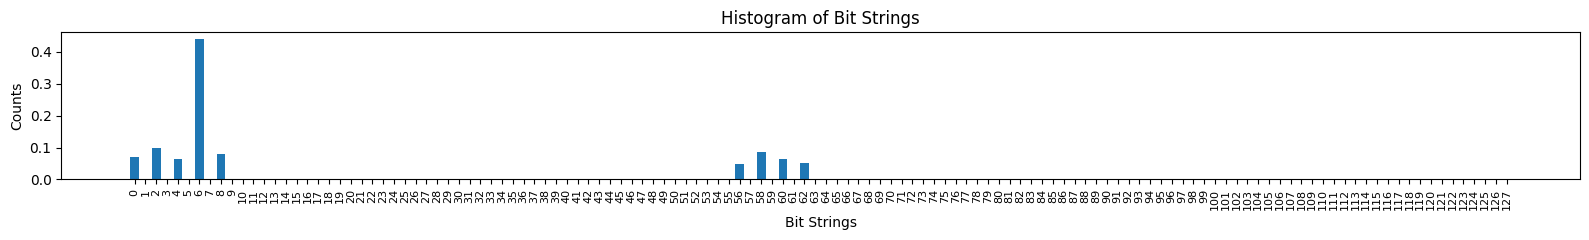

In [217]:
circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=10, angle = 2, bitString='000000')
sampler = Sampler()
job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
job_result = job.result()

plot_states_quasi(job_result, qubit_num=7)

In [215]:
def transformationtBlock(circuit):
    #circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])
    #circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    #circuit.append(gate4, [0, 1, 2, 6, 3])
    #circuit.append(gate3, [0, 1, 6, 2])
    #circuit.ccx(0, 6, 1)
    circuit.cx(2,1)

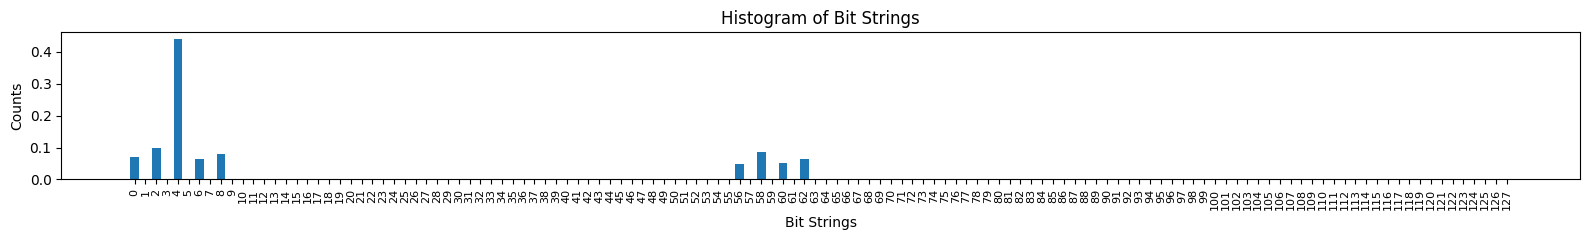

In [218]:
circuit = get_circuit_qw_steps_and_transformation(transformationtBlock, num_qubits=7, num_steps=10, angle = 2, bitString='000000')
sampler = Sampler()
job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
job_result = job.result()

plot_states_quasi(job_result, qubit_num=7)

In [176]:
def get_quasi_dist_in_executions( sampler, execution_number=10, angles = [-2,2]):

    list_num = [i for i in range(0,64)]
    list_binary_rep = to_binary_list(list_num,6)

    list_quasi_probs = []
    for i in range( len(list_binary_rep) ):
        list_quasi_probs.append([[] for i in angles ])

    for i, bin_num in enumerate(list_binary_rep):

        print("index", i, " val ", bin_num)
        for j, rot_angle in enumerate(angles):
            circuit_aux = circuit_initialized_qw_steps(num_qubits=7, 
                                                       num_steps= execution_number , 
                                                       angle = rot_angle, 
                                                       bitString=bin_num )
            job = sampler.run(circuits=[circuit_aux], parameter_values=[[]], parameters=[[]])
            job_result = job.result()
            counts = job_result.quasi_dists[0]
            list_quasi_probs[i][j].append(counts)

    return list_quasi_probs



def get_quasi_dist_in_transformation( sampler, execution_number=10, angles = [-2,2]):

    list_num = [i for i in range(0,64)]
    list_binary_rep = to_binary_list(list_num,6)
    print("list numbers", list_num)

    list_quasi_probs = []
    for i in range( len(list_binary_rep) ):
        list_quasi_probs.append([[] for i in angles ])

    for i, bin_num in enumerate(list_binary_rep):
        for j, rot_angle in enumerate(angles):
            circuit_aux = get_circuit_qw_steps_and_transformation( transformation=transformationtBlock,
                                                                    num_qubits=7, 
                                                                    num_steps= execution_number , 
                                                                    angle = rot_angle, 
                                                                    bitString=bin_num )
            job = sampler.run(circuits=[circuit_aux], parameter_values=[[]], parameters=[[]])
            job_result = job.result()
            counts = job_result.quasi_dists[0]
            list_quasi_probs[i][j].append(counts)

    return list_quasi_probs

In [32]:
def generate_numbers(a, b, step=1):
    if a > b:
        return "Error: 'a' should be less than or equal to 'b'"
    result = []
    current = a
    while current <= b:
        result.append(current)
        current += step
    
    return result

# Example usage:
numbers = generate_numbers(1, 10, 0.5)

In [157]:
#from qiskit.primitives import Sampler
#sampler = Sampler()
list_of_denominators = generate_numbers(-5, 5, 0.3)
#print("list of denominators: ",list_of_denominators)
list_quasi_probs = get_quasi_dist_in_executions(sampler, execution_number=10, angles=[3,2,1.7])

index 0  val  000000
index 1  val  000001
index 2  val  000010
index 3  val  000011
index 4  val  000100
index 5  val  000101
index 6  val  000110
index 7  val  000111
index 8  val  001000
index 9  val  001001
index 10  val  001010
index 11  val  001011
index 12  val  001100
index 13  val  001101
index 14  val  001110
index 15  val  001111
index 16  val  010000
index 17  val  010001
index 18  val  010010
index 19  val  010011
index 20  val  010100
index 21  val  010101
index 22  val  010110
index 23  val  010111
index 24  val  011000
index 25  val  011001
index 26  val  011010
index 27  val  011011
index 28  val  011100
index 29  val  011101
index 30  val  011110
index 31  val  011111
index 32  val  100000
index 33  val  100001
index 34  val  100010
index 35  val  100011
index 36  val  100100
index 37  val  100101
index 38  val  100110
index 39  val  100111
index 40  val  101000
index 41  val  101001
index 42  val  101010
index 43  val  101011
index 44  val  101100
index 45  val  10110

In [159]:
list_quasi_probs

[[[{0: 0.221920806840511, 2: 0.359986518488245, 4: 0.014000764849086, 6: 5.1810288065e-05, 8: 2.8614397e-08, 10: 1.819e-12, 54: 2.5341e-11, 56: 3.09353638e-07, 58: 0.000384688557024, 60: 0.055101515409729, 62: 0.348553557572422}],
  [{0: 0.221920806840511, 2: 0.359986518488245, 4: 0.014000764849086, 6: 5.1810288065e-05, 8: 2.8614397e-08, 10: 1.819e-12, 54: 2.5341e-11, 56: 3.09353638e-07, 58: 0.000384688557024, 60: 0.055101515409729, 62: 0.348553557572422}],
  [{0: 0.221920806840511, 2: 0.359986518488245, 4: 0.014000764849086, 6: 5.1810288065e-05, 8: 2.8614397e-08, 10: 1.819e-12, 54: 2.5341e-11, 56: 3.09353638e-07, 58: 0.000384688557024, 60: 0.055101515409729, 62: 0.348553557572422}]],
 [[{1: 0.221920806840512, 3: 0.359986518488246, 5: 0.014000764849086, 7: 5.1810288065e-05, 9: 2.8614397e-08, 11: 1.819e-12, 55: 2.5341e-11, 57: 3.09353638e-07, 59: 0.000384688557024, 61: 0.055101515409729, 63: 0.348553557572414}],
  [{1: 0.221920806840512, 3: 0.359986518488246, 5: 0.014000764849086, 7: 5.

In [219]:
list_quasi_probs_trans = get_quasi_dist_in_transformation(sampler, execution_number=10, angles=[3,2,1.7])

list numbers [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [391]:
list_quasi_probs_trans

[[[{1: 0.002518130539887, 3: 0.040290088638192, 5: 0.153203062046735, 7: 0.103142626913778, 9: 0.186240934730061, 11: 0.014504431909748, 13: 0.000100725221596, 49: 0.000100725221596, 51: 0.014504431909751, 53: 0.186240934730059, 55: 0.103142626913779, 57: 0.153203062046738, 59: 0.040290088638194, 61: 0.002518130539887}]],
 [[{0: 0.05363397548161, 2: 0.070052539404549, 4: 0.088660245183882, 6: 0.063222416812605, 8: 0.00529772329247, 10: 0.437828371278479, 12: 0.184982486865144, 14: 0.008581436077059, 16: 4.3782837128e-05, 52: 4.3782837128e-05, 54: 0.004378283712785, 56: 0.027364273204903, 58: 0.000700525394046, 60: 0.015805604203152, 62: 0.03940455341506}]],
 [[{1: 0.053633975481608, 3: 0.070052539404547, 5: 0.088660245183883, 7: 0.063222416812607, 9: 0.005297723292471, 11: 0.437828371278481, 13: 0.184982486865144, 15: 0.008581436077058, 17: 4.3782837128e-05, 53: 4.3782837128e-05, 55: 0.004378283712785, 57: 0.027364273204903, 59: 0.000700525394046, 61: 0.015805604203152, 63: 0.039404553

In [160]:
vectors = generate_list_of_vectors(list_quasi_probs)
#vectors_transf = generate_list_of_vectors(list_quasi_probs_trans)

In [161]:
#vectors = list_of_vectors
Y = scaled_image[0,:,0]
coefficients = linear_combination(vectors, Y)
print("Coeficientes de la combinación lineal:", coefficients)
reconstructed_Y = np.dot(np.array(vectors).T, coefficients)
print("Vector reconstruido:", reconstructed_Y)
print("Vector original:", Y)

Coeficientes de la combinación lineal: [0.23381426 0.23381426 0.23381426 0.19193356 0.19193356 0.19193356
 0.18693554 0.18693554 0.18693554 0.32406809 0.32406809 0.32406809
 0.41800041 0.41800041 0.41800041 0.39039856 0.39039856 0.39039856
 0.34188156 0.34188156 0.34188156 0.21413625 0.21413625 0.21413625
 0.12530862 0.12530862 0.12530862 0.20601858 0.20601858 0.20601858
 0.31500714 0.31500714 0.31500714 0.42977446 0.42977446 0.42977446
 0.48706106 0.48706106 0.48706106 0.36097172 0.36097172 0.36097172
 0.22357096 0.22357096 0.22357096 0.1585753  0.1585753  0.1585753
 0.13110662 0.13110662 0.13110662 0.19659843 0.19659843 0.19659843
 0.2250227  0.2250227  0.2250227  0.26248258 0.26248258 0.26248258
 0.30560005 0.30560005 0.30560005 0.24978956 0.24978956 0.24978956
 0.20745305 0.20745305 0.20745305 0.17574596 0.17574596 0.17574596
 0.162121   0.162121   0.162121   0.24325175 0.24325175 0.24325175
 0.29400976 0.29400976 0.29400976 0.27566275 0.27566275 0.27566275
 0.28726365 0.28726365 0

In [220]:
vectors_tfr = generate_list_of_vectors(list_quasi_probs_trans)

In [189]:
len(vectors_tfr)

192

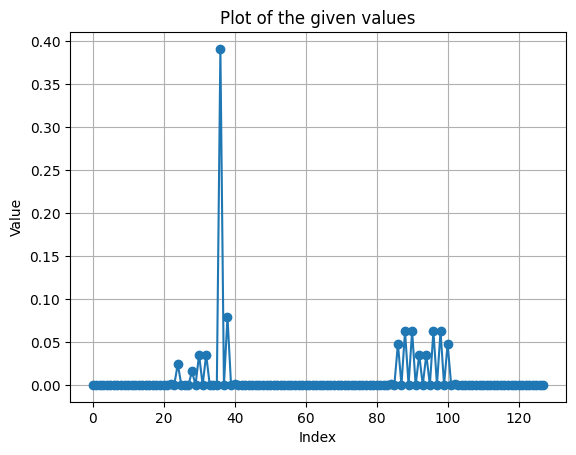

In [312]:
import matplotlib.pyplot as plt

# Your list of values
values = vectors[10]

# Generate x-axis values (indices of the list)
x_values = range(len(values))

# Plot the values
plt.plot(x_values, values, marker='o', linestyle='-')

# Labeling the axes and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of the given values')

# Display the plot
plt.grid(True)
plt.show()

In [31]:
list_num = [i for i in range(0,64)]
list_binary_rep = to_binary_list(list_num,6)


list_of_vectors = []

for binary_string in list_binary_rep:
    circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=15, angle = -3, bitString=binary_string)
    sampler = Sampler()
    job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
    job_result = job.result()

    vect = np.zeros(128)
    for key, value in job_result.quasi_dists[0].items():
        vect[key] = value
    list_of_vectors.append(vect)

    circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=16, angle = -3, bitString=binary_string)
    sampler = Sampler()
    job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
    job_result = job.result()

    vect = np.zeros(128)
    for key, value in job_result.quasi_dists[0].items():
        vect[key] = value
    list_of_vectors.append(vect)
    

In [48]:
#vectors = list_of_vectors
Y = scaled_image[0,:,0]
coefficients = linear_combination(vectors, Y)
print("Coeficientes de la combinación lineal:", coefficients)
reconstructed_Y = np.dot(np.array(vectors).T, coefficients)
print("Vector reconstruido:", reconstructed_Y)
print("Vector original:", Y)

Coeficientes de la combinación lineal: [3.29303823 3.23999221 3.24471215 3.33275148 2.94162261 2.63350161
 2.76550902 2.9945471  3.19738129 3.23695709 3.11174688 3.09594925
 3.39093379 3.55607422 3.16508123 2.71587808 2.81388773 3.07290248
 2.97286647 2.79108    3.06655252 3.45207224]
Vector reconstruido: [0.38609913 0.10410839 0.91605141 1.25278352 0.11452324 0.08811919
 1.24922093 0.02419789 0.08683129 1.20346729 0.02231611 0.08656032
 1.1905384  0.02265075 0.08852342 1.10264436 0.02374421 0.07860199
 1.04809678 0.02510438 0.0709076  1.10682909 0.02556761 0.07450365
 1.17203111 0.02506979 0.08043561 1.21094342 0.0250898  0.08553946
 1.21955027 0.02688347 0.08654832 1.22110864 0.0279368  0.08360914
 1.2363362  0.02577306 0.08335146 1.26838105 0.02309683 0.09054985
 1.25925865 0.02330095 0.09435533 1.16740601 0.02442452 0.08439093
 1.07908205 0.02379185 0.07308821 1.09323886 0.02282807 0.0755198
 1.14035576 0.02449782 0.08201555 1.14640867 0.02681621 0.10076226
 1.14364551 0.3918787  0

In [41]:
def generate_list_of_vectors(list_quasi_probs):
    list_of_vectors = []

    for vectors in list_quasi_probs:
        for vector in vectors:
            vect = np.zeros(128)
            for key, value in vector[0].items():
                #print(f"Key: {key}, Value: {value}")
                vect[key] = value
            list_of_vectors.append(vect)
    
    return list_of_vectors

In [28]:
counts = list_quasi_probs[21]
bit_strings = list(counts.keys())
counts = list(counts.values())

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(bit_strings, counts)
plt.xlabel('Bit Strings')
plt.ylabel('Counts')
plt.title('Histogram of Bit Strings')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()

IndexError: list index out of range

In [67]:
from PIL import Image

image = Image.open("C:/Users/luisj/OneDrive/Escritorio/virtual/Lena.bmp")

In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


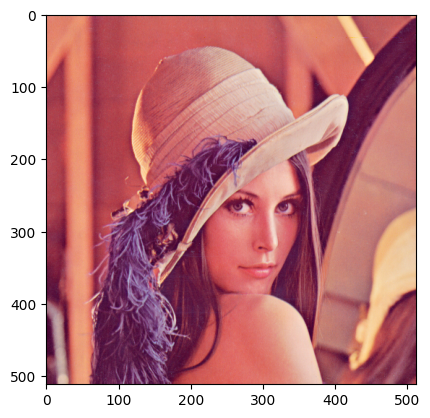

In [46]:
import matplotlib.image as img
import cv2
image = img.imread("Lena.png")
image.shape
plt.imshow(image)

In [47]:
scaled_image = cv2.resize(image, (0, 0), fx=0.25, fy=0.25)
scaled_image.shape

(128, 128, 3)

In [236]:
Y = scaled_image[0,:,0]
coefficients = linear_combination(vectors, Y)
print("Coeficientes de la combinación lineal:", coefficients)
reconstructed_Y = np.dot(np.array(vectors).T, coefficients)
print("Vector reconstruido:", reconstructed_Y)
print("Vector original:", Y)

Coeficientes de la combinación lineal: [1.62160631 1.6038111  1.83119818 1.97535552 1.94902248 2.0352352
 2.36437022 2.20756532 1.62867746 1.10872273 0.71814161 0.97688248
 1.18075218 1.34509896 1.45016799 1.48632672 1.54707551 1.53101523
 1.41239554 1.32314303 1.40253943 1.55758743 1.56243605 1.53618447
 1.8372864  1.92371007 1.82901555 1.71455648 1.61856906 1.49625405
 1.445585   1.56813238 1.6722018  1.90351617 2.05462866 1.84595107
 1.58191655 1.56205356 1.63498664 1.41021782 1.42583188 1.64438477
 1.84199415 1.95295354 1.88577666 1.83597618 1.5417443  1.45887909
 1.53385112 1.45622082 1.20091661 1.37554873 1.50388424 1.45767974
 1.28123482 1.12940634 1.28073545 1.22115759 1.44884184 1.60206931
 1.88256783 1.96482769 1.81894492 1.73700007]
Vector reconstruido: [0.7393355  0.73878591 0.75630688 0.75215488 0.72898256 0.74732565
 0.73804881 0.73047092 0.74961454 0.75678235 0.74401974 0.76551498
 0.81323699 0.79969767 0.73396561 0.64956621 0.55380071 0.56376037
 0.59173009 0.63933276 0

In [44]:
def linear_combination(vectors, Y):
    A = np.array(vectors).T  
    Y = np.array(Y)
    coef, residuals, rank, s = np.linalg.lstsq(A, Y, rcond=None)
    return coef

def get_linear_combination(vectors, img):

    dim = img.shape
    list_coefficients = []
    for i in range(dim[1]):
        v = scaled_image[i,:,0]
        coefficients = linear_combination(vectors, v)
        list_coefficients.append(coefficients)
    
    return list_coefficients

def calculate_linear_combination(vectors, list_coefficients, img):
    img_shape = img.shape
    reconstructed_img = np.zeros(img_shape)
    
    for i in range(len(list_coefficients)):
        reconstructed_row = np.zeros((img_shape[1], img_shape[2]))
        for vector, coef in zip(vectors, list_coefficients[i]):
            reconstructed_row[:, 0] += vector * coef  # Red channel
        reconstructed_img[i, :, 0] = reconstructed_row[:, 0]  # Assuming the image is 3D (height x width x channels)
    
    return reconstructed_img

In [208]:
list_coefficients = get_linear_combination(vectors, scaled_image)

In [223]:
aux = calculate_linear_combination(vectors_tfr, list_coefficients, scaled_image)

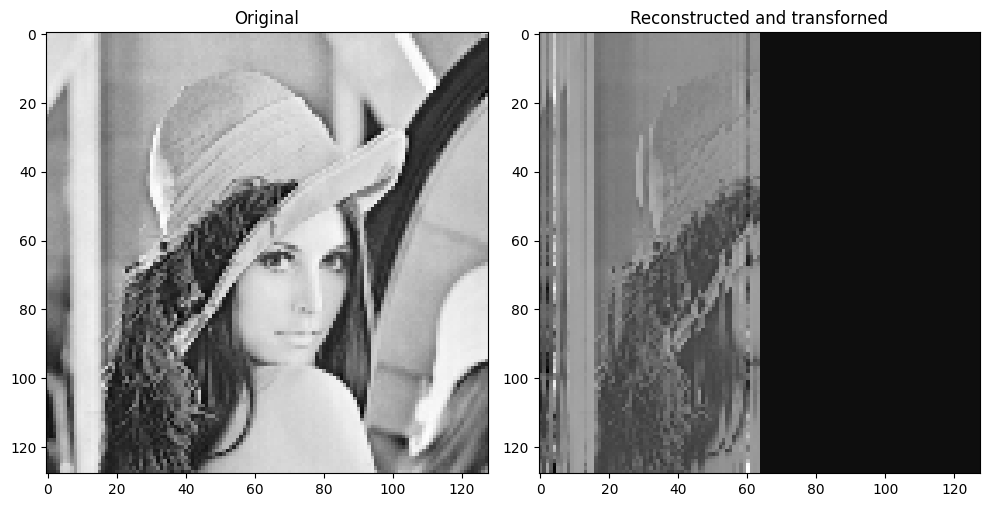

In [224]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))



# Mostramos la segunda imagen
ax[0].imshow(scaled_image[:, :, 0], cmap='gray')
ax[0].set_title('Original')

# Mostramos la primera imagen
ax[1].imshow(aux[:, :, 0], cmap='gray')
ax[1].set_title('Reconstructed and transforned')

# Ajustamos el layout para que no se solapen los títulos y las imágenes
plt.tight_layout()

# Mostramos la figura
plt.show()

In [ ]:
len(coefficients)

125

In [ ]:
coefficients = linear_combination(vectors, Y)
print("Coeficientes de la combinación lineal:", coefficients)

# Verificar la combinación lineal
reconstructed_Y = np.dot(np.array(vectors).T, coefficients)
print("Vector reconstruido:", reconstructed_Y)
print("Vector original:", Y)

Coeficientes de la combinación lineal: [ 3.20313055e-01  6.70521353e+00 -1.18471037e+02  3.98216278e+00
 -1.21682385e-01 -6.66509109e+00  1.97145563e+01 -1.91859947e+02
  1.86360769e+01 -6.77982359e+00 -7.59812170e+00  1.03485536e+02
 -7.38375020e+01  1.05899030e+02 -8.63558942e+00  1.30106526e+01
  1.50989488e+02 -2.90756162e+02  1.50922170e+02  1.23882439e+01
 -1.00613028e+01  5.58469601e+01  9.35473749e+01  5.34065897e+01
 -8.16679055e+00 -4.62106793e+01  2.91319566e+02  2.33634592e+02
  2.89142421e+02 -4.63151554e+01 -3.85410340e+01  2.59171959e+01
 -9.70293564e+01  2.39660330e+01 -3.88520258e+01 -2.91211722e+00
  1.06001425e+02 -1.33948957e+02  1.04952239e+02 -2.71798764e+00
 -1.36282031e+01 -1.04713056e+02  2.24788707e+01 -1.03911665e+02
 -1.16221382e+01 -1.46390791e+02 -3.39112627e+02  3.04486217e+01
 -3.38714035e+02 -1.46001912e+02 -1.74945033e+01  1.65797295e+02
 -2.95958885e+01  1.65864530e+02 -2.26787707e+01  4.49970471e+00
  3.12860575e+02 -3.10471206e+01  3.13088709e+02  4

In [ ]:
import numpy as np

def linear_combination(vectors, Y):
    """
    Encuentra la combinación lineal de una lista de vectores que resulta en el vector Y.

    :param vectors: Lista de vectores (lista de listas o 2D numpy array)
    :param Y: Vector objetivo (lista o 1D numpy array)
    :return: Coeficientes de la combinación lineal
    """
    A = np.array(vectors).T  
    Y = np.array(Y)
    
    coef, residuals, rank, s = np.linalg.lstsq(A, Y, rcond=None)
    
    return coef

# Ejemplo de uso
vectors = [[3, 4, 1], [0, 1, 4], [2, 3, 1]]  # Vectores base en R^3
Y = [1, 2, 3]  # Vector objetivo en R^3

coefficients = linear_combination(vectors, Y)
print("Coeficientes de la combinación lineal:", coefficients)

# Verificar la combinación lineal
reconstructed_Y = np.dot(np.array(vectors).T, coefficients)
print("Vector reconstruido:", reconstructed_Y)
print("Vector original:", Y)

Coeficientes de la combinación lineal: [3.33333333e-01 6.66666667e-01 2.85001299e-15]
Vector reconstruido: [1. 2. 3.]
Vector original: [1, 2, 3]


In [ ]:
service = QiskitRuntimeService(channel="ibm_cloud")
 
# Bell Circuit
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(2, name="cr")
qc = QuantumCircuit(qr, cr, name="bell")
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.measure(qr, cr)
 
with Session(service, backend="ibmq_qasm_simulator") as session:
    sampler = Sampler(session=session)
 
    job = sampler.run(qc, shots=1024)
    print(f"Job ID: {job.job_id()}")
    print(f"Job result: {job.result()}")
 
    # You can run more jobs inside the session

AccountNotFoundError: 'Unable to find account.'

In [ ]:
 
#service = QiskitRuntimeService()
service = QiskitRuntimeService(
    channel='ibm_quantum',
    #instance='ibm-q/open/main',
    )
backend = service.least_busy(operational=True, simulator=False)
 
# Bell Circuit
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(2, name="cr")
qc = QuantumCircuit(qr, cr, name="bell")
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.measure(qr, cr)
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
with Session(backend=backend) as session:
    sampler = Sampler(session=session)
    job = sampler.run([isa_circuit])
    pub_result = job.result()[0]
    print(f"Sampler job ID: {job.job_id()}")
    print(f"Counts: {pub_result.data.cr.get_counts()}")

In [ ]:
from qiskit.primitives import Sampler
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
 
# a Bell circuit
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()
 
# two parameterized circuits
pqc = RealAmplitudes(num_qubits=2, reps=2)
pqc.measure_all()
pqc2 = RealAmplitudes(num_qubits=2, reps=3)
pqc2.measure_all()
 
theta1 = [0, 1, 1, 2, 3, 5]
theta2 = [0, 1, 2, 3, 4, 5, 6, 7]
 
# initialization of the sampler
sampler = Sampler()
 
# Sampler runs a job on the Bell circuit
job = sampler.run(circuits=[bell], parameter_values=[[]], parameters=[[]])
job_result = job.result()
print([q.binary_probabilities() for q in job_result.quasi_dists])
 
# Sampler runs a job on the parameterized circuits
job2 = sampler.run(
    circuits=[pqc, pqc2],
    parameter_values=[theta1, theta2],
    parameters=[pqc.parameters, pqc2.parameters])
job_result = job2.result()
print([q.binary_probabilities() for q in job_result.quasi_dists])

[{'00': 0.4999999999999999, '11': 0.4999999999999999}]
[{'00': 0.1309248462975777, '01': 0.3608720796028448, '10': 0.0932486523205006, '11': 0.4149544217790772}, {'00': 0.1880263994380416, '01': 0.6881971261189544, '10': 0.0932623272058244, '11': 0.0305141472371799}]


In [ ]:
import numpy as np

def linear_combination(vectors, Y):
    """
    Encuentra la combinación lineal de una lista de vectores que resulta en el vector Y.

    :param vectors: Lista de vectores (lista de listas o 2D numpy array)
    :param Y: Vector objetivo (lista o 1D numpy array)
    :return: Coeficientes de la combinación lineal
    """
    # Convertir la lista de vectores y Y a matrices de NumPy si no lo son
    A = np.array(vectors).T  # Transponer para que cada vector sea una columna
    Y = np.array(Y)
    
    # Resolver el problema de los mínimos cuadrados lineales
    coef, residuals, rank, s = np.linalg.lstsq(A, Y, rcond=None)
    
    return coef

# Ejemplo de uso
vectors = [[3, 4, 1], [0, 1, 4], [2, 3, 1]]  # Vectores base en R^3
Y = [1, 2, 3]  # Vector objetivo en R^3

coefficients = linear_combination(vectors, Y)
print("Coeficientes de la combinación lineal:", coefficients)

# Verificar la combinación lineal
reconstructed_Y = np.dot(np.array(vectors).T, coefficients)
print("Vector reconstruido:", reconstructed_Y)
print("Vector original:", Y)

Coeficientes de la combinación lineal: [3.33333333e-01 6.66666667e-01 2.85001299e-15]
Vector reconstruido: [1. 2. 3.]
Vector original: [1, 2, 3]


In [ ]:
A = np.array(vectors).T
A[:,0]*0.33+A[:,1]*0.66

array([0.99, 1.98, 2.97])

# IJ matrix QW

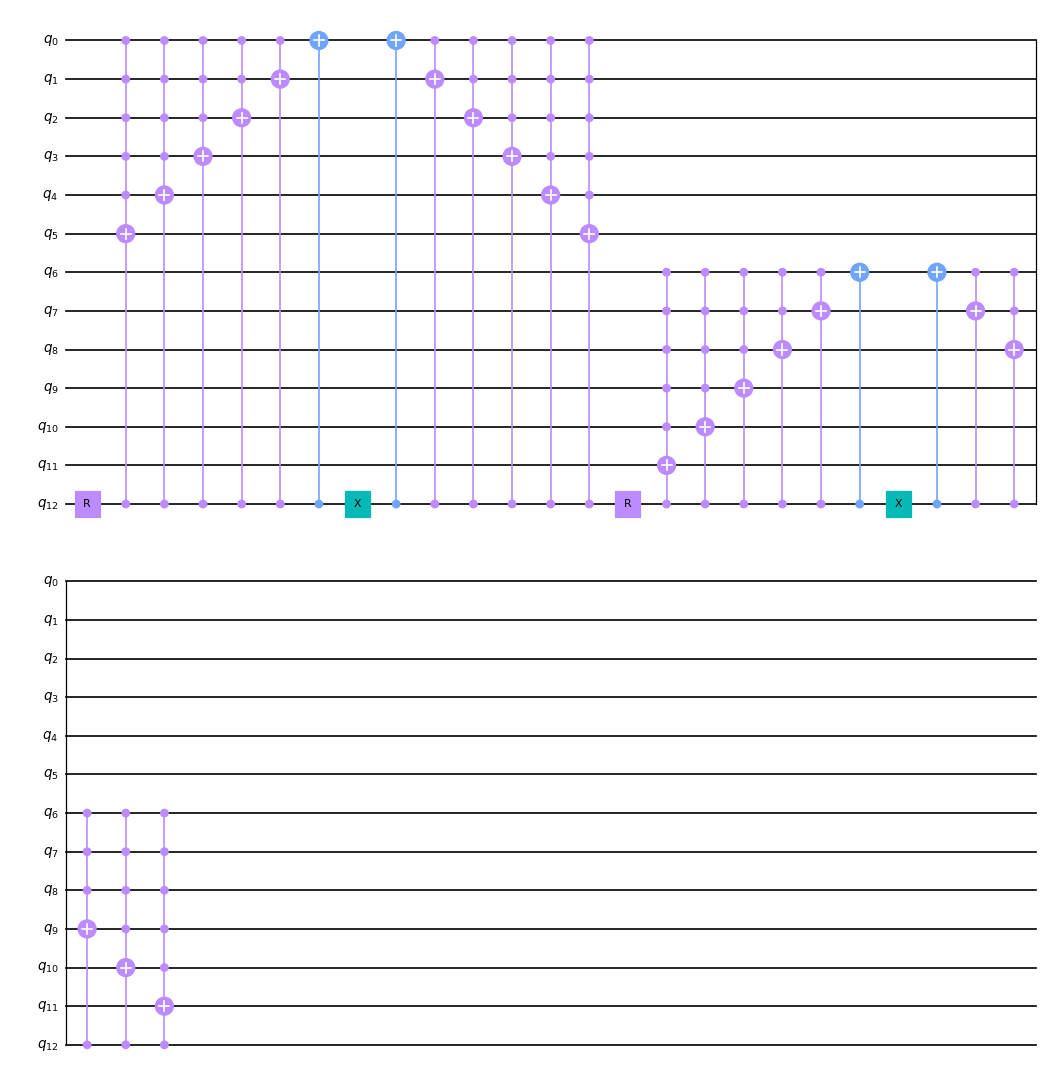

In [ ]:
one_step_circuit = QuantumCircuit(13, name='ONE STEP')

beta = np.pi / 3  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])


one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 0, 12, R_gate)

one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 6, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 6, 12, R_gate)

one_step_gate = one_step_circuit.to_instruction()
circuit_drawer(one_step_circuit, scale=0.6, output='mpl')

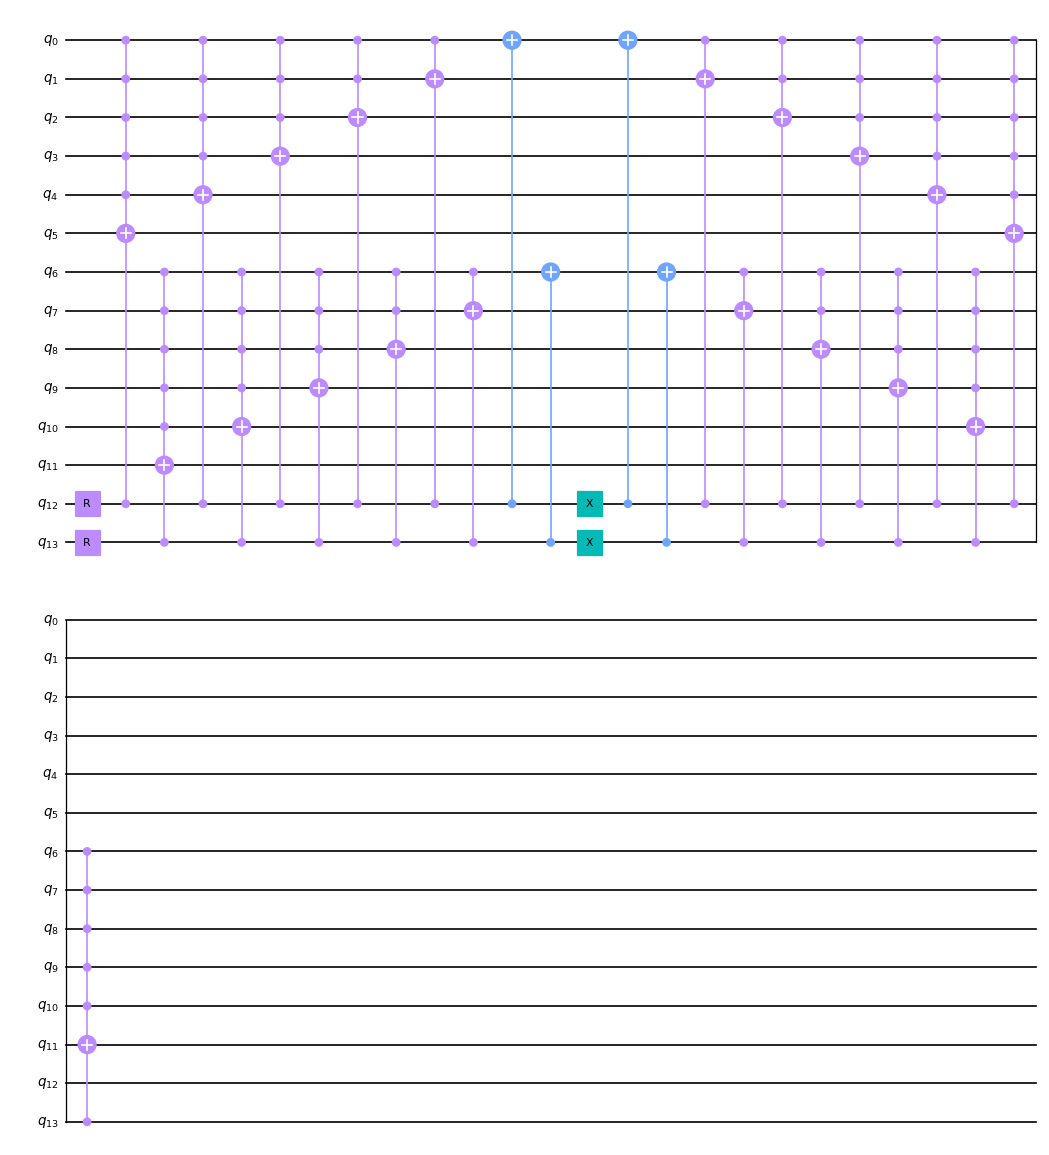

In [ ]:
one_step_circuit = QuantumCircuit(14, name='ONE STEP')


beta = np.pi / 5  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')


gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])


one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 0, 12, R_gate)

one_step_circuit.append(R_gate, [13])
incrementBlock(one_step_circuit, 6, 13, R_gate)
one_step_circuit.x(13)
decrementBlock(one_step_circuit, 6, 13, R_gate)

one_step_gate = one_step_circuit.to_instruction()

circuit_drawer(one_step_circuit, scale=0.6, output='mpl')

In [ ]:
#circuit_drawer(circuit, scale=0.6, output='mpl')

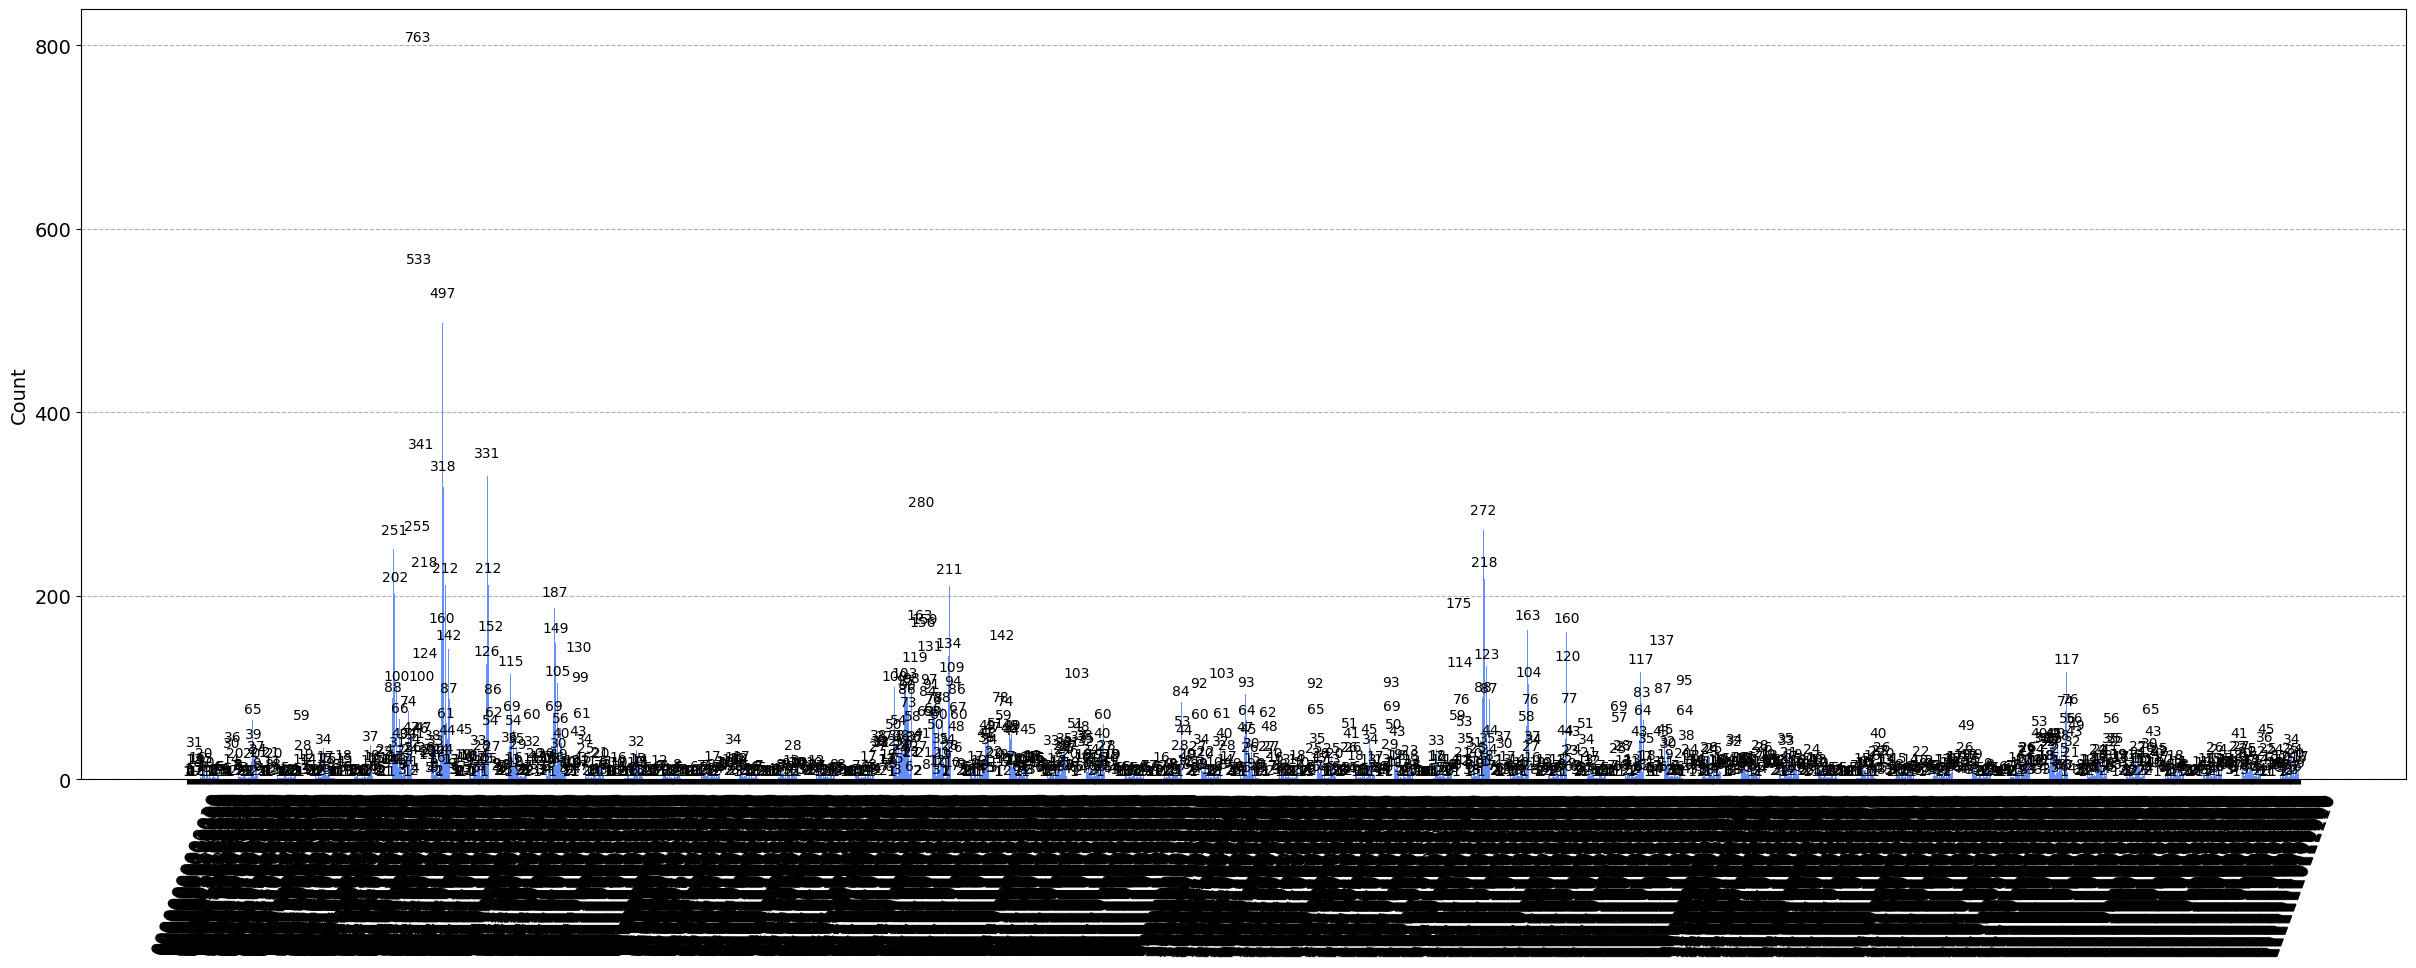

In [ ]:
one_step_circuit = QuantumCircuit(14, name='ONE STEP')


beta = np.pi / 3  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

beta = np.pi / 3  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')


gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])


one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)

one_step_circuit.append(R_gate, [13])
incrementBlock(one_step_circuit, 6, 13, R_gate)
one_step_circuit.x(13)
decrementBlock(one_step_circuit, 6, 13, R_gate)
one_step_circuit.x(13)

one_step_gate = one_step_circuit.to_instruction()


num_steps = 50

# Create Quantum Registers and Classical Registers
qr = QuantumRegister(14, 'q')
cr = ClassicalRegister(14, 'c')
circuit = QuantumCircuit(qr, cr)

#for i in range(0,12):
#    circuit.x(i)

circuit.h(12)
circuit.h(13)
for _ in range(num_steps):
    circuit.append(one_step_gate, qr)
    
circuit.measure(qr, cr)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=8*4096)
result = job.result()

# Get and plot the measurement results
counts = result.get_counts(circuit)
plot_histogram(counts, sort='asc', figsize =(30,10))

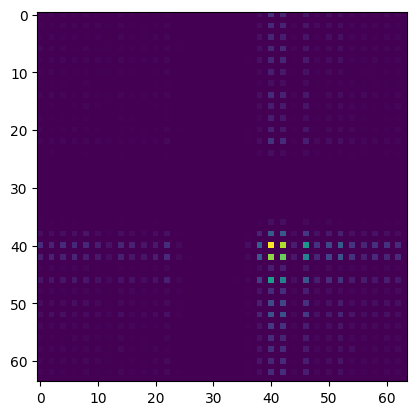

In [ ]:
mat = np.zeros((64,64))
for i in range(0,64):
    for j in range(0,64):
        cont = 0
        cad = bin(i)[2:].zfill(6)+bin(j)[2:].zfill(6)
        cad00 = '00'+cad
        if cad00 in counts:
            cont = cont + counts[cad00]
        cad01 = '01'+cad
        if cad01 in counts:
            cont = cont + counts[cad01]
        cad10 = '10'+cad
        if cad10 in counts:
            cont = cont + counts[cad10]
        cad11 = '11'+cad
        if cad11 in counts:
            cont = cont + counts[cad11]
        mat[i,j] = cont
        #print(bin(i)[2:].zfill(6)+bin(j)[2:].zfill(6) )
#counts[]
plt.imshow(mat*100)

In [ ]:
len(counts)

1102

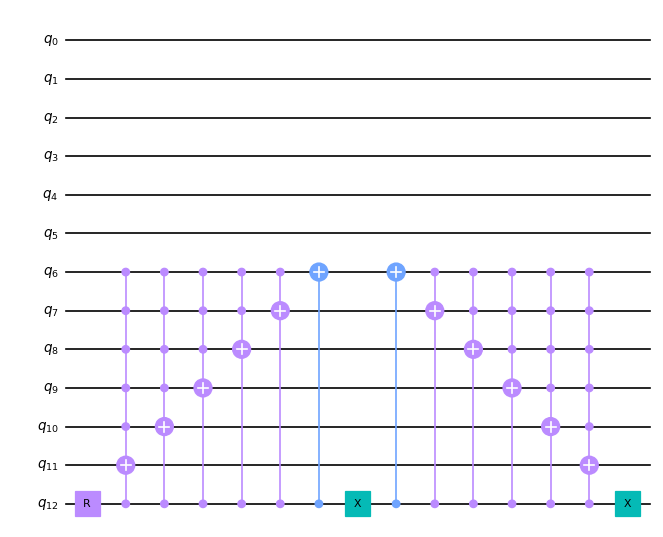

In [ ]:
beta = np.pi / 6  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])

j_step_circuit = QuantumCircuit(13, name='J STEP')

j_step_circuit.append(R_gate, [12])
incrementBlock(j_step_circuit, 0, 12, R_gate)
j_step_circuit.x(12)
decrementBlock(j_step_circuit, 0, 12, R_gate)
j_step_circuit.x(12)

j_step_gate = j_step_circuit.to_instruction()

#circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 12)

i_step_circuit = QuantumCircuit(13, name='I STEP')

i_step_circuit.append(R_gate, [12])
incrementBlock(i_step_circuit, 6, 12, R_gate)
i_step_circuit.x(12)
decrementBlock(i_step_circuit, 6, 12, R_gate)
i_step_circuit.x(12)

i_step_gate = i_step_circuit.to_instruction()

circuit_drawer(j_step_circuit, scale=0.6, output='mpl')

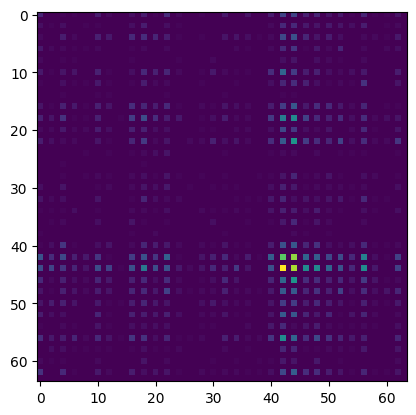

In [ ]:
plt.imshow(mat)

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.extensions import UnitaryGate

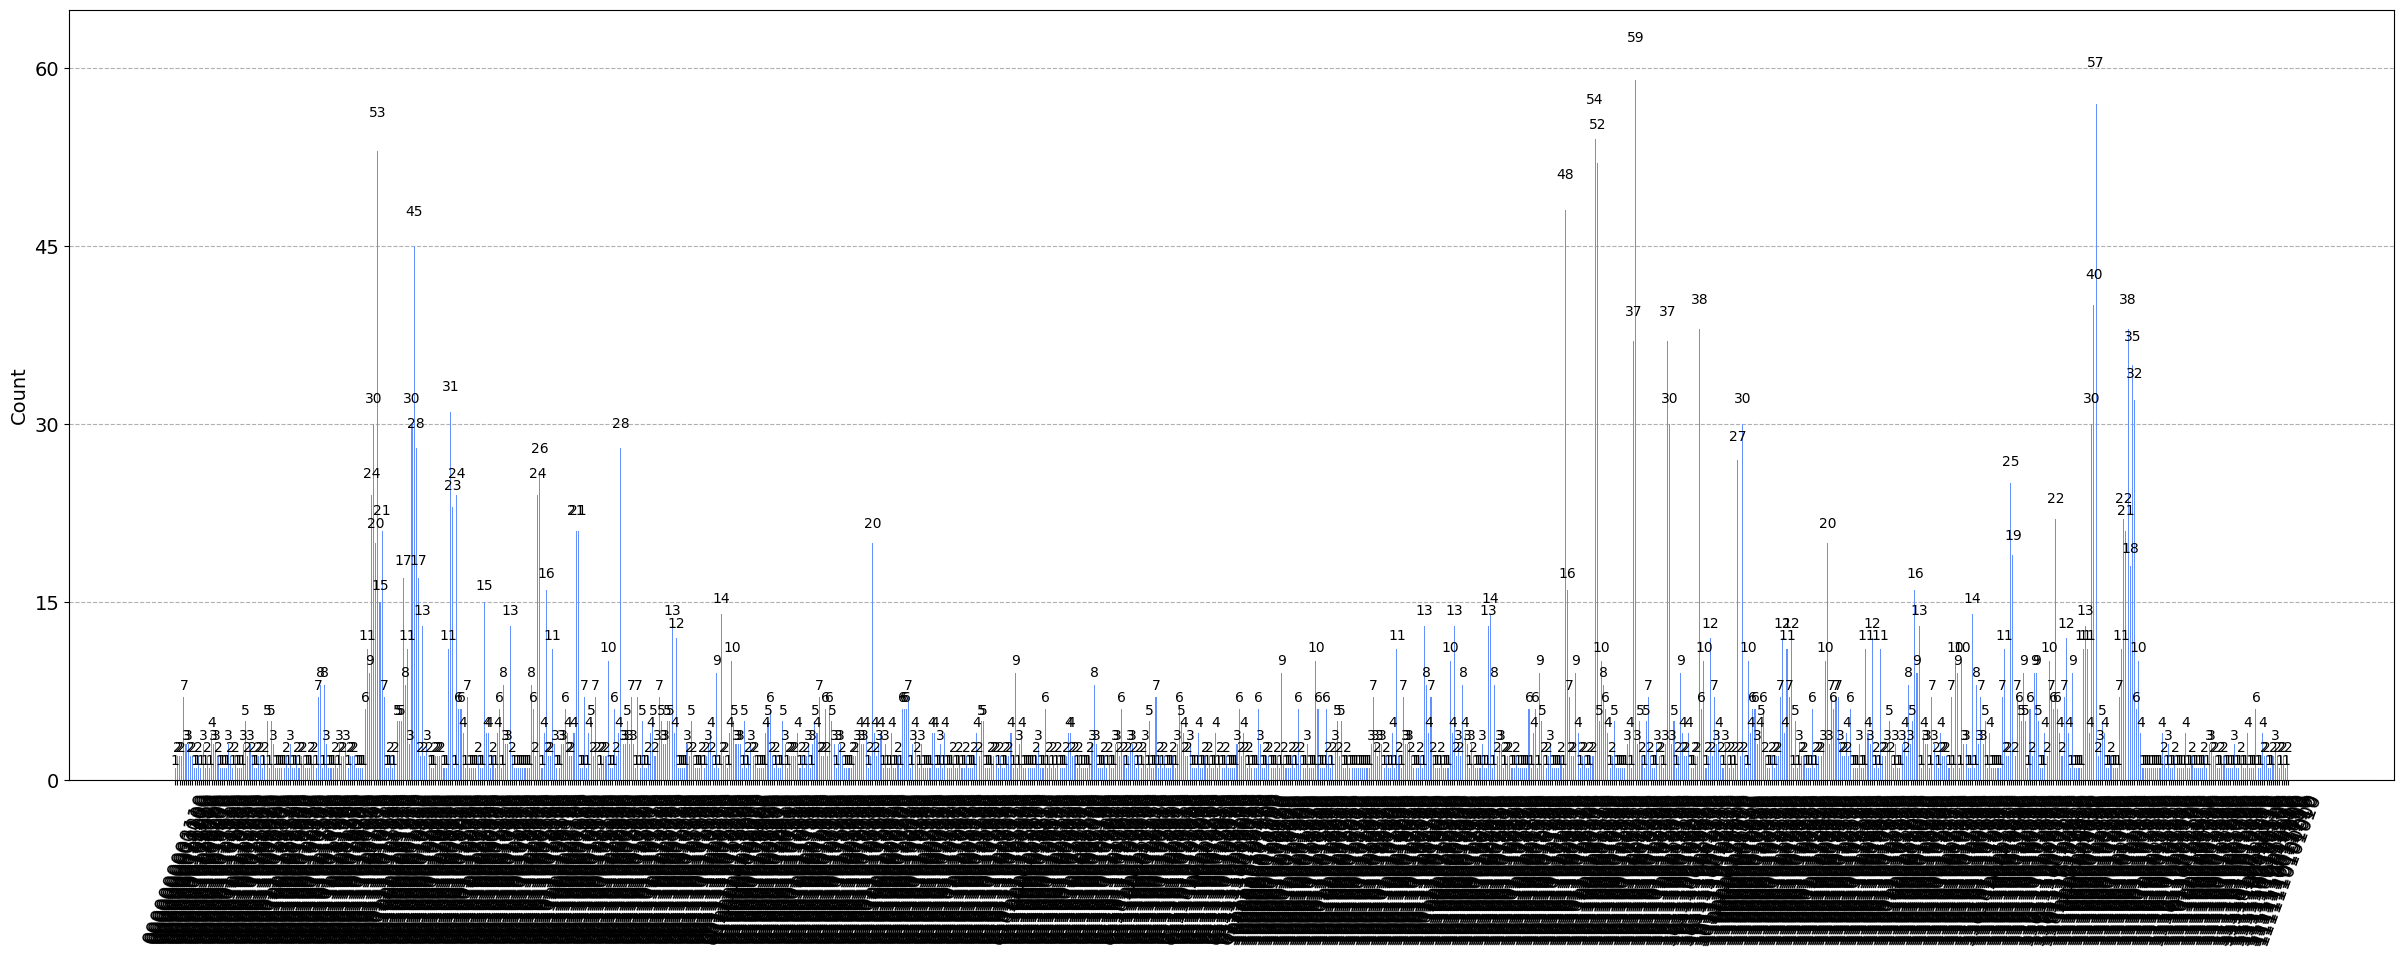

In [ ]:
one_step_circuit = QuantumCircuit(13, name='ONE STEP')


beta = np.pi / 3  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

inverse_R_gate = R_gate.inverse()

gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])


#circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 12)

one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)

#one_step_circuit.append(inverse_R_gate, [12])

one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 6, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 6, 12, R_gate)
one_step_circuit.x(12)

one_step_gate = one_step_circuit.to_instruction()


num_steps = 50

qr = QuantumRegister(13, 'q')
cr = ClassicalRegister(13, 'c')
circuit = QuantumCircuit(qr, cr)

#for i in range(0,6):
#    circuit.x(i)
#circuit.x(5)

circuit.h(12)
for _ in range(num_steps):
    circuit.append(one_step_gate, qr)

circuit.measure(qr, cr)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=4096)
result = job.result()

# Get and plot the measurement results
counts = result.get_counts(circuit)
plot_histogram(counts, sort='asc', figsize =(30,10))

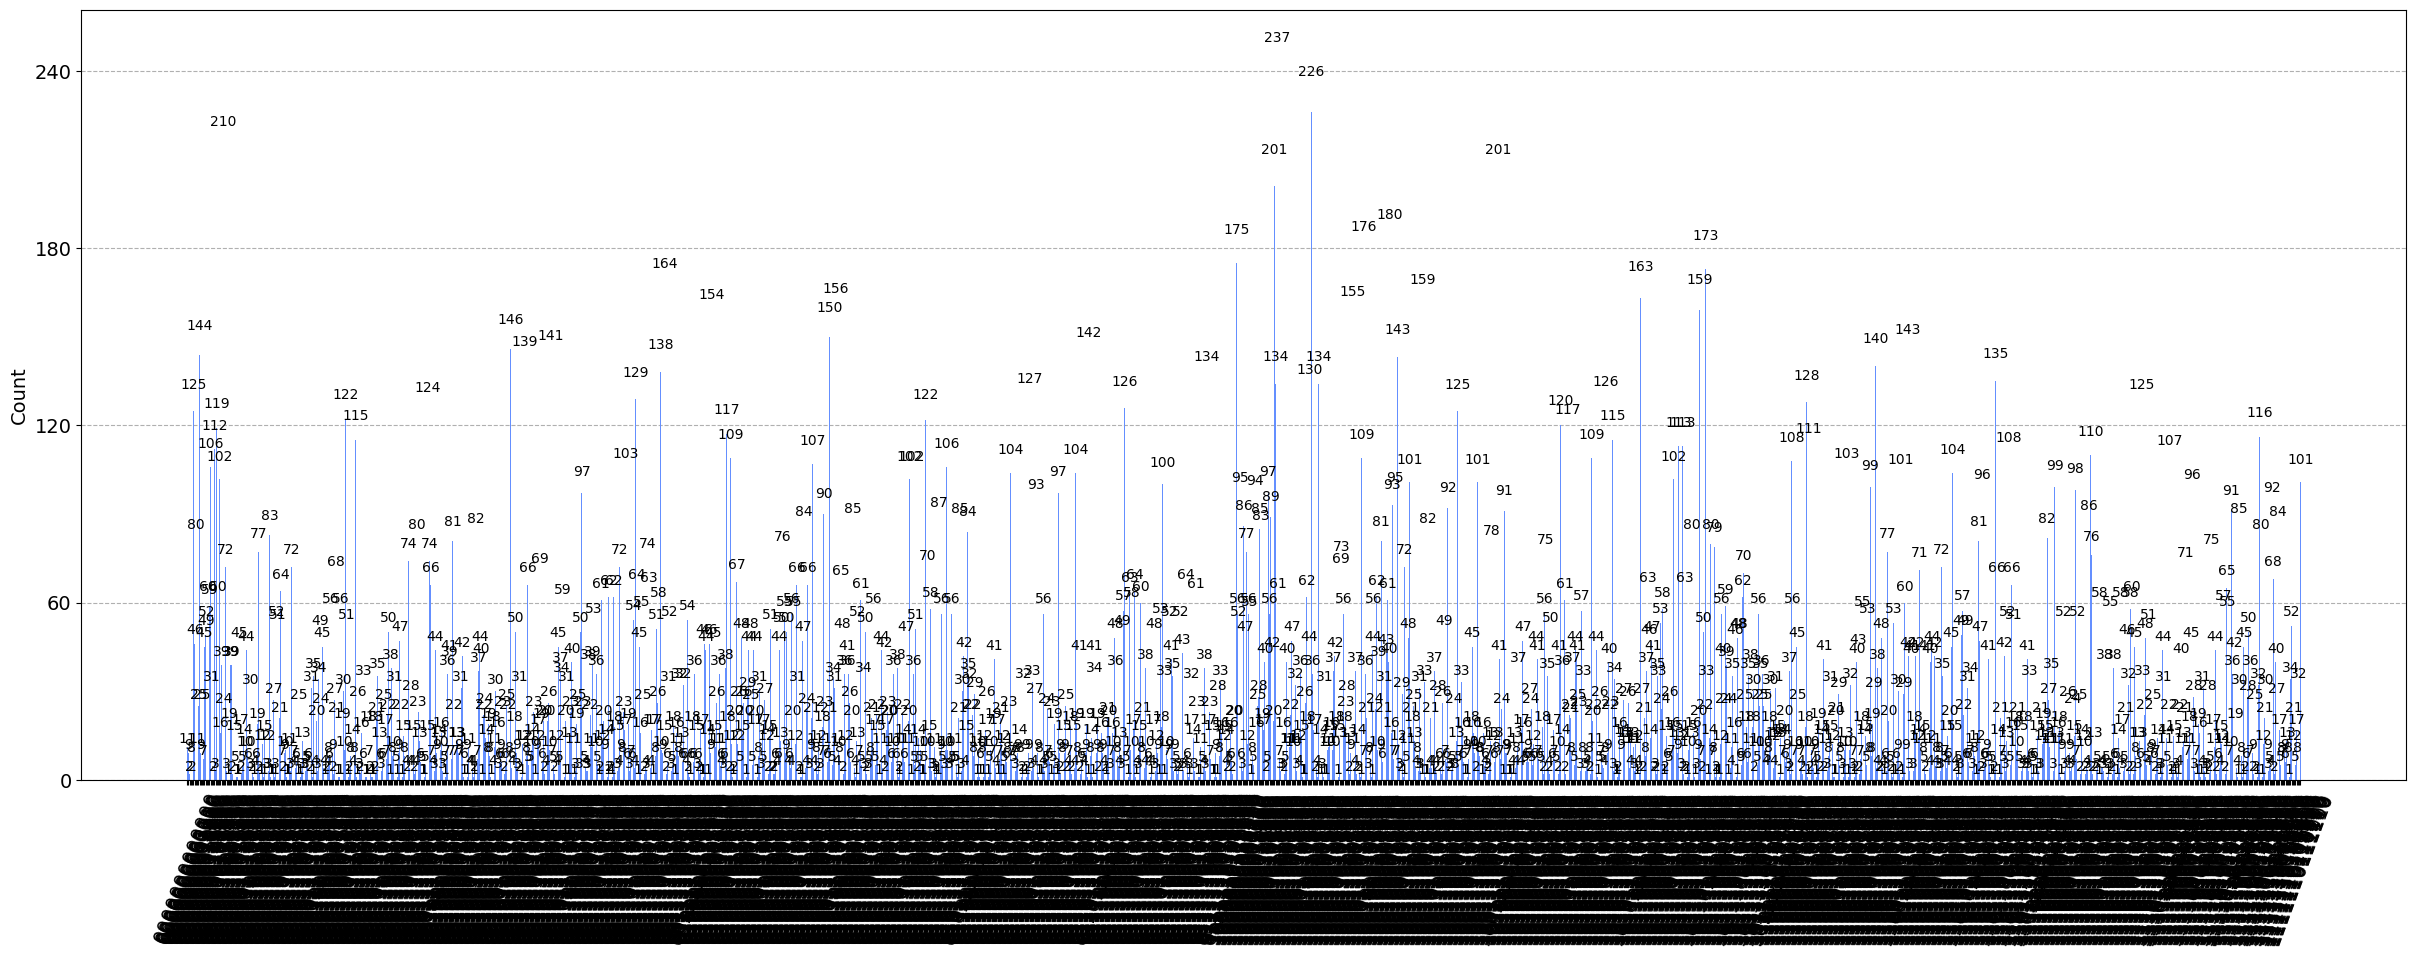

In [ ]:
one_step_circuit = QuantumCircuit(13, name='ONE STEP')


beta = np.pi / 5  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

inverse_R_gate = R_gate.inverse()

gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])

one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 0, 12)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 0, 12)

one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 6, 12)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 6, 12)
one_step_circuit.x(12)

one_step_gate = one_step_circuit.to_instruction()


num_steps = 500

qr = QuantumRegister(13, 'q')
cr = ClassicalRegister(13, 'c')
circuit = QuantumCircuit(qr, cr)


circuit.h(12)
for _ in range(num_steps):
    circuit.append(one_step_gate, qr)

circuit.measure(qr, cr)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=20*2048)
result = job.result()

# Get and plot the measurement results
counts = result.get_counts(circuit)
plot_histogram(counts, sort='asc', figsize =(30,10))

In [ ]:
len(counts)

611

In [ ]:
mat1 = mat

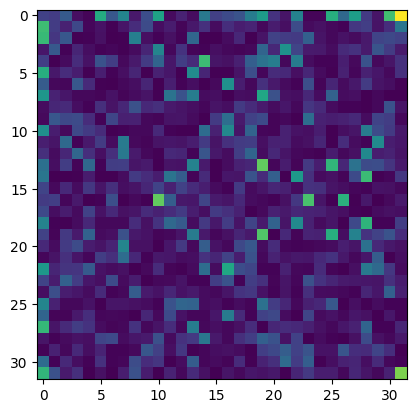

In [ ]:
mat = np.zeros((32,32))
for i in range(0,32):
    for j in range(0,32):
        cont = 0
        cad = bin(i*2)[2:].zfill(6)+bin(j*2)[2:].zfill(6)
        cad0 = '0'+cad
        if cad0 in counts:
            cont = cont + counts[cad0]
        cad1 = '1'+cad
        if cad1 in counts:
            cont = cont + counts[cad1]
        
        mat[i,j] = cont
        #print(bin(i)[2:].zfill(6)+bin(j)[2:].zfill(6) )
#counts[]
plt.imshow(mat*100)

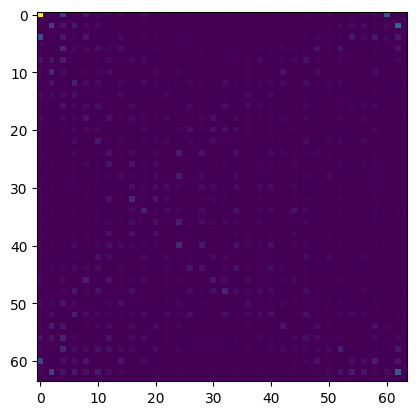

In [ ]:
mat = np.zeros((64,64))
for i in range(0,64):
    for j in range(0,64):
        cont = 0
        cad = bin(i)[2:].zfill(6)+bin(j)[2:].zfill(6)
        cad0 = '0'+cad
        if cad0 in counts:
            cont = cont + counts[cad0]
        cad1 = '1'+cad
        if cad1 in counts:
            cont = cont + counts[cad1]
        
        mat[i,j] = cont
        #print(bin(i)[2:].zfill(6)+bin(j)[2:].zfill(6) )
#counts[]
plt.imshow(mat*100)

In [ ]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 3.5 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2

In [ ]:
resized = cv2.resize(mat, (100,100), interpolation = cv2.INTER_AREA)

In [ ]:
temp = np.floor( ( resized /np.max(resized) )*255 ).astype(np.uint8)
temp

array([[ 49,  49,  49, ..., 255, 255, 255],
       [ 49,  49,  49, ..., 255, 255, 255],
       [ 49,  49,  49, ..., 255, 255, 255],
       ...,
       [167, 167, 167, ..., 204, 204, 204],
       [167, 167, 167, ..., 204, 204, 204],
       [167, 167, 167, ..., 204, 204, 204]], dtype=uint8)

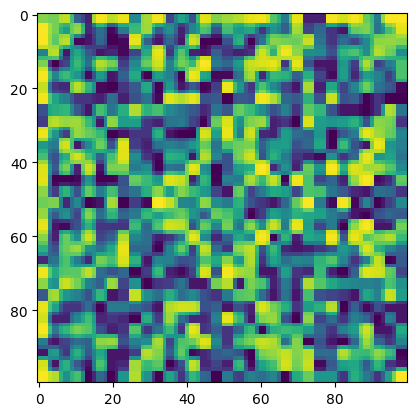

In [ ]:
#temp = np.array(resized)
dst = cv2.equalizeHist(temp)
plt.imshow(dst, vmin=0, vmax=255)

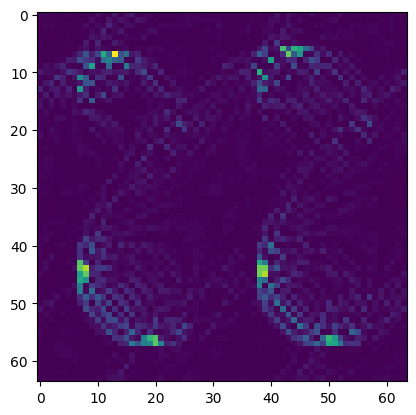

In [ ]:
mat2 = mat + mat1
plt.imshow(mat2*100)

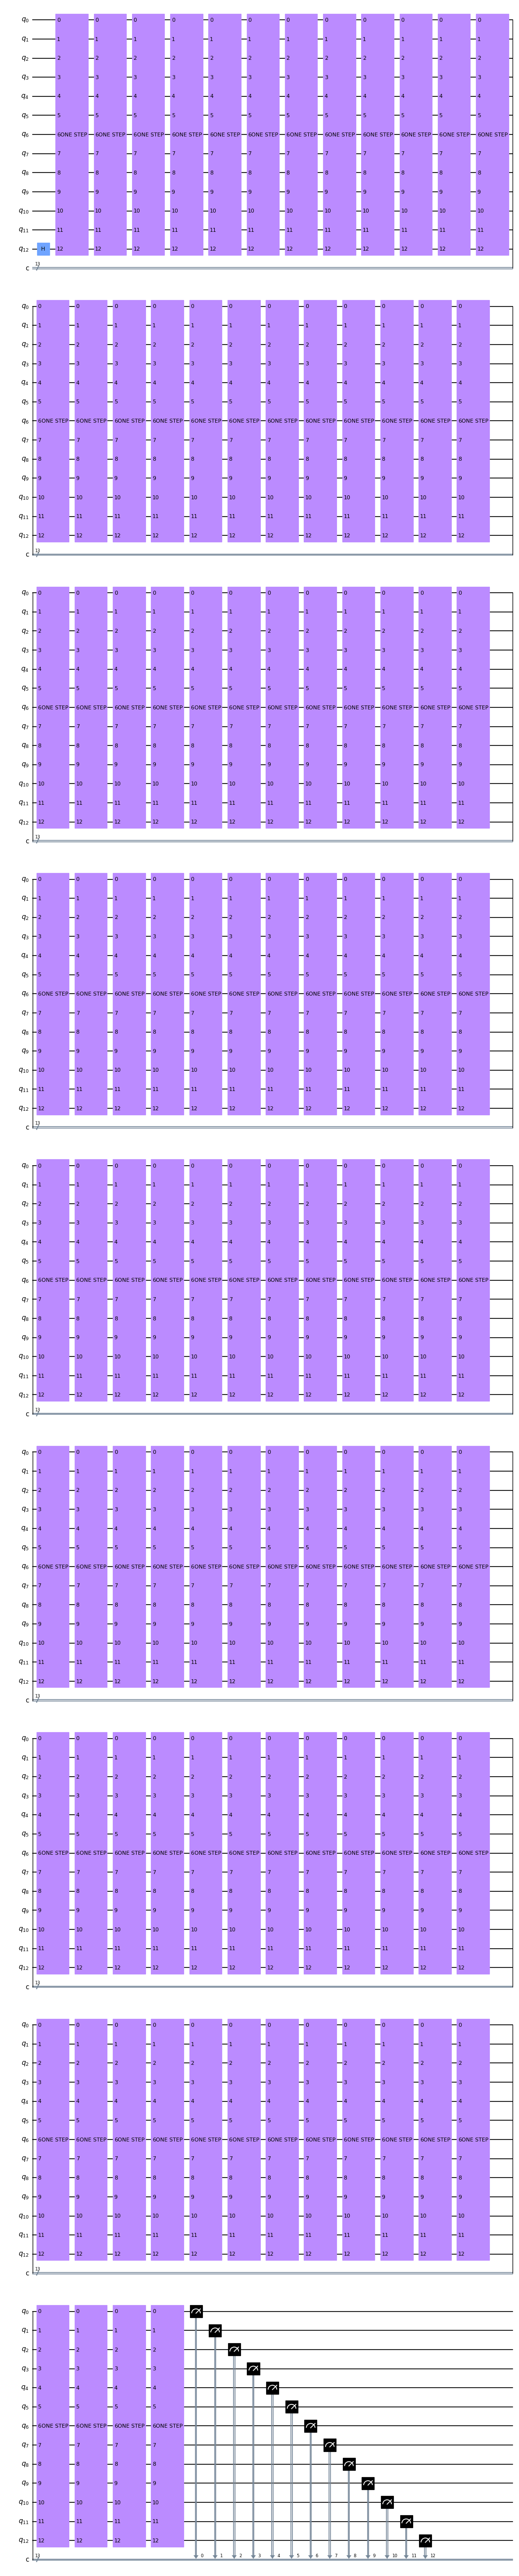

In [ ]:
circuit_drawer(circuit, scale=0.6, output='mpl')

In [ ]:
#counts

In [ ]:
len(counts)

809

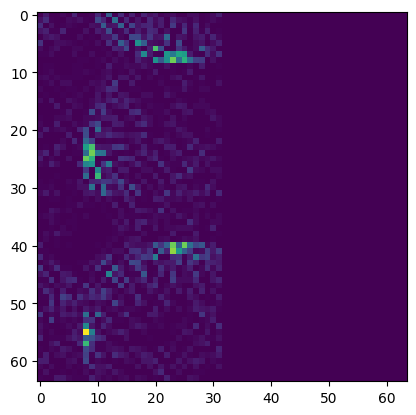

In [ ]:
plt.imshow(mat*100)

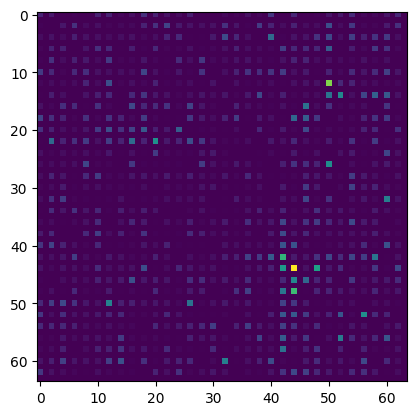

In [ ]:
plt.imshow(mat)

In [ ]:
# Define a Quantum Circuit
one_step_circuit = QuantumCircuit(7, name='ONE STEP')


beta = np.pi / 5  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')


gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit):
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.ccx(0, 6, 1)
    circuit.cx(6,0)

def decrementBlock(circuit):
    circuit.cx(6,0)
    circuit.ccx(0, 6, 1)
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])

one_step_circuit.append(R_gate, [6])
incrementBlock(one_step_circuit)
one_step_circuit.x(6)
decrementBlock(one_step_circuit)
one_step_gate = one_step_circuit.to_instruction()


num_steps = 123
num_steps1 = 20

# Create Quantum Registers and Classical Registers
qr = QuantumRegister(7, 'q')
cr = ClassicalRegister(7, 'c')
circuit = QuantumCircuit(qr, cr)



for _ in range(num_steps):
    circuit.append(one_step_gate, qr)
    
#for _ in range(num_steps1):
#    circuit.append(sec_step_gate, qr)
    
circuit.measure(qr, cr)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=5000)
result = job.result()

# Get and plot the measurement results
counts = result.get_counts(circuit)
plot_histogram(counts, sort='asc', figsize =(30,10))


Traceback (most recent call last):
  Cell In[150], line 47
    circuit.x(i)
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:3837 in x
    return self.append(XGate(label=label), [qubit], [])
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1278 in append
    expanded_qargs = [self.qbit_argument_conversion(qarg) for qarg in qargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1278 in <listcomp>
    expanded_qargs = [self.qbit_argument_conversion(qarg) for qarg in qargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1149 in qbit_argument_conversion
    return _bit_argument_conversion(
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:5226 in _bit_argument_conversion
    raise CircuitError(
CircuitError: 'Index 7 out of range for size 7.'

Use %tb to get the full traceback.


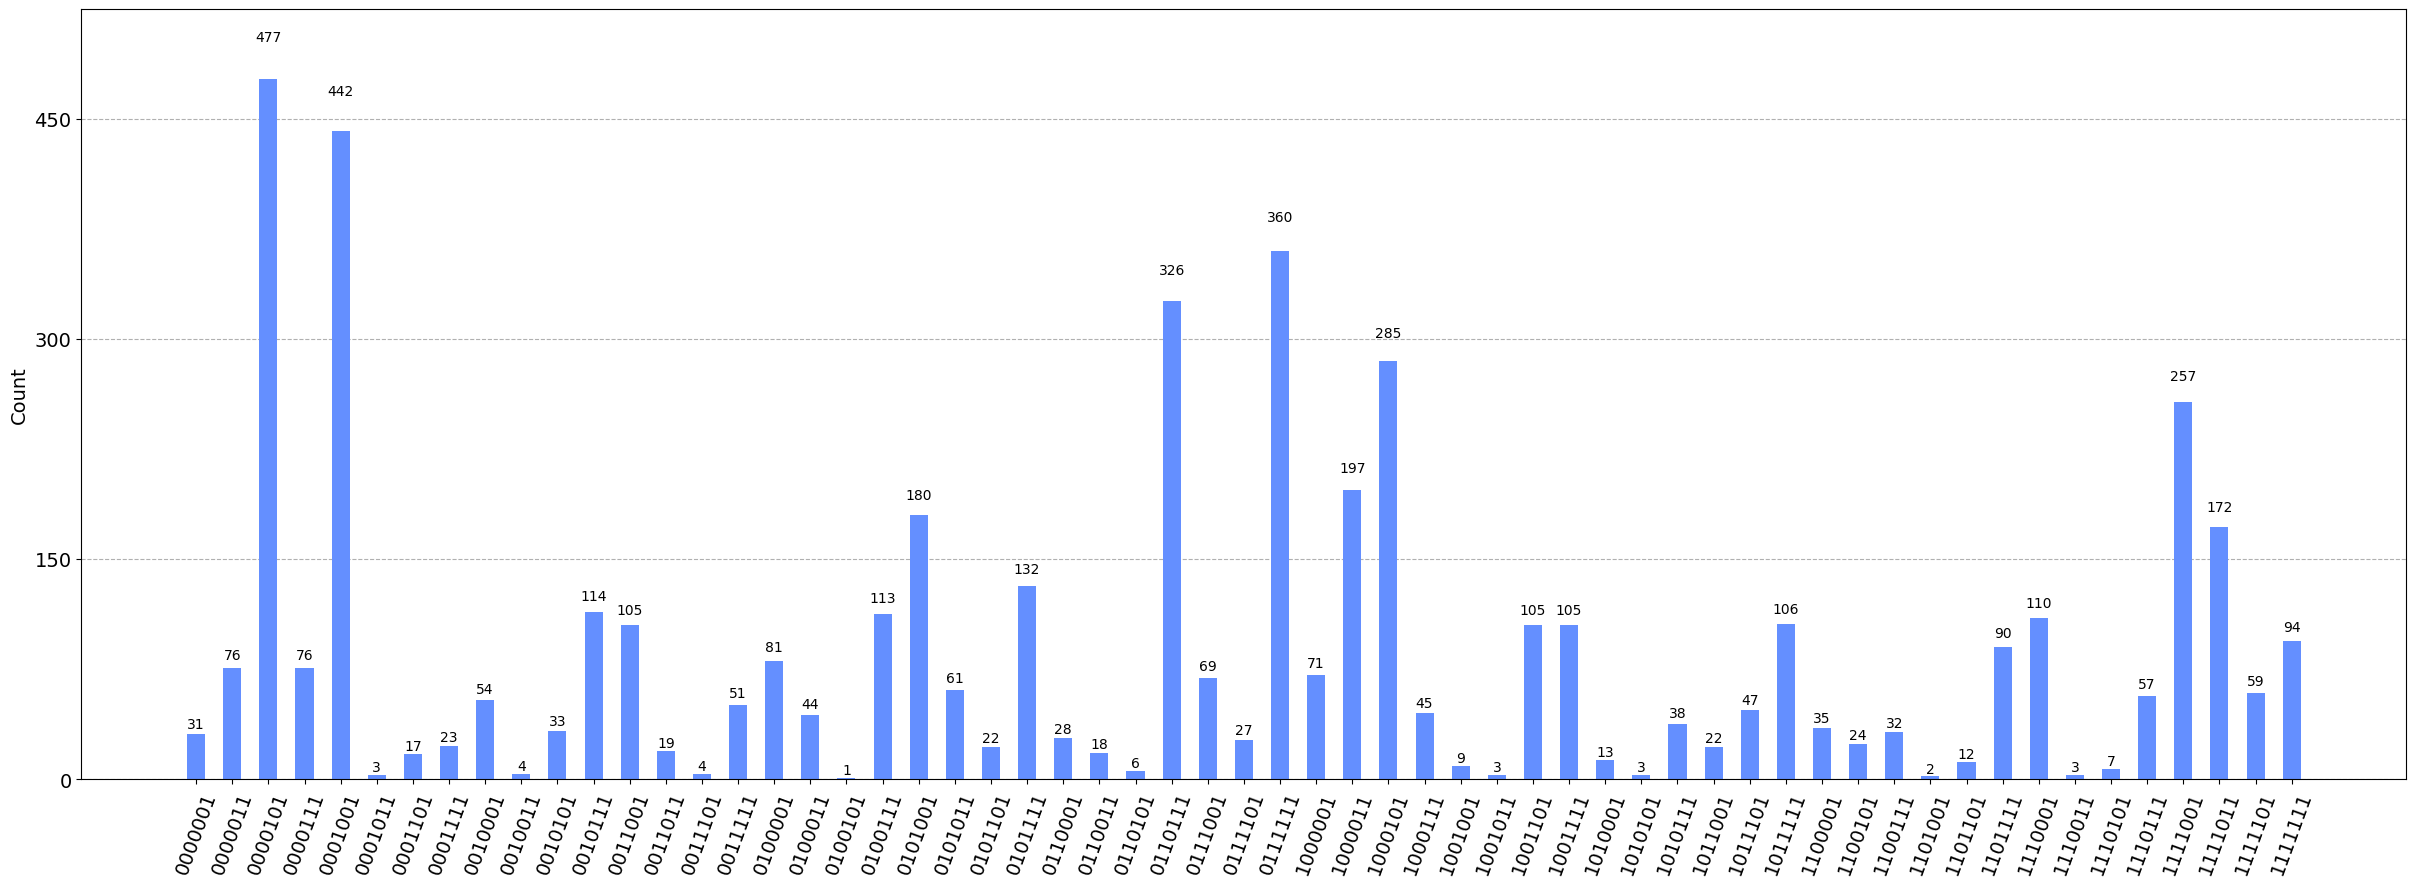

In [ ]:
counts = result.get_counts(circuit)
plot_histogram(counts, sort='asc', figsize =(30,10))

In [ ]:
len(counts)

56

In [ ]:
simulator = Aer.get_backend('qasm_simulator')

# Number of shots (how many times to run the circuit)
shots = 1024  # You can adjust this number as needed

# Run the simulation
job = execute(circuit, simulator, shots=shots)

# Get the results
result = job.result()

# Get the counts (frequencies of each outcome)
counts = result.get_counts(circuit)

# Calculate the probabilities
probabilities = {state: count / shots for state, count in counts.items()}

# Print the probabilities
#for state, prob in probabilities.items():
#    print(f"State: {state}, Probability: {prob}")

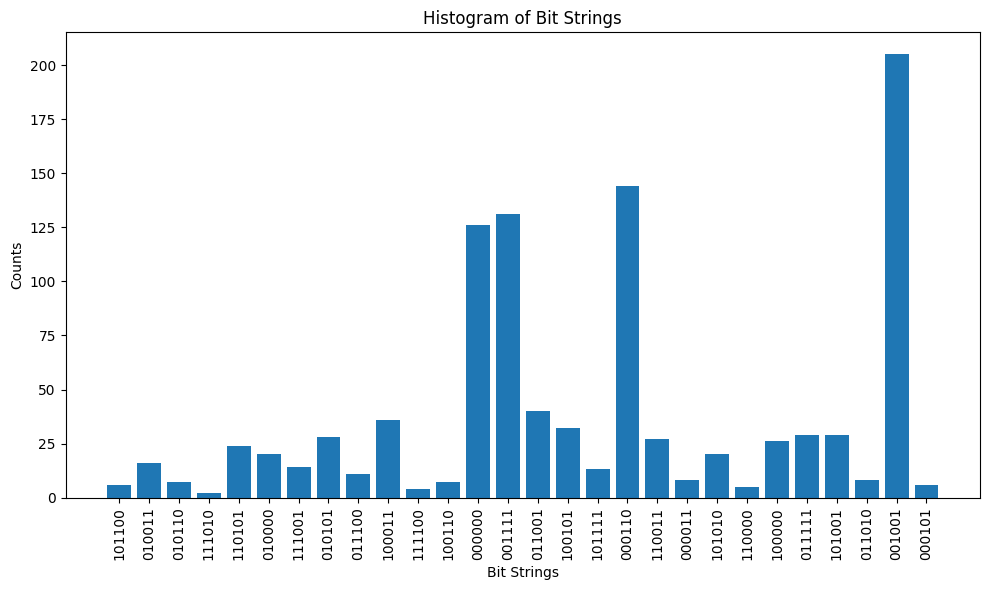

In [ ]:
bit_strings = list(counts.keys())
counts = list(counts.values())

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(bit_strings, counts)
plt.xlabel('Bit Strings')
plt.ylabel('Counts')
plt.title('Histogram of Bit Strings')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()